<a href="https://colab.research.google.com/github/JayCherukuri/Classifying-the-2016-Election/blob/master/Classifying_the_2016_Election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### *Importing Packages*

In [0]:
#Restart Runtime After Running seaborn Install

#!pip install -U seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, auc,accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#### *Google Drive Mounting Code* 


In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')

# Data Preparation

In [0]:
county_facts=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Voting_Datasets/county_facts.csv')
final_votes=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Voting_Datasets/votes.csv')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

## Evaluating Data Accuracy

In [4]:
county_facts.describe()

,fips,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
count,3195.000000,3.195000e+03,3.195000e+03,3195.000000,3.195000e+03,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3.195000e+03,3195.000000,3.195000e+03,3195.000000,3195.000000,3195.000000,3.195000e+03,3195.000000,3195.000000,3195.000000,3195.000000,3.195000e+03,3.195000e+03,3195.000000,3.195000e+03,3.195000e+03,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,3.195000e+03,3.195000e+03,3.195000e+03,3195.000000,3.195000e+03,3.195000e+03,3.195000e+03,3195.000000
mean,30358.079499,2.993963e+05,2.899137e+05,0.508545,2.899019e+05,5.900782,22.545290,17.524632,49.913271,84.953271,9.266479,2.243818,1.447230,0.126322,1.924820,9.044069,76.937308,86.362817,4.595806,9.343318,84.602723,19.906228,1.996599e+04,22.988638,1.257814e+05,72.058529,12.592081,131963.693271,1.085542e+05,2.526870,23697.013772,46060.551174,16.647731,7.025741e+03,1.100748e+05,0.689139,2.160151e+04,2.564908e+04,2.447230,0.598654,0.854742,0.019781,1.735055,18.108169,4.732329e+06,3.804132e+06,3.677504e+06,10287.325196,5.739886e+05,9.823005e+02,3.316344e+03,261.265227
std,15181.225584,5.768468e+06,5.584181e+06,4.180066,5.583955e+06,1.211925,3.418896,4.433712,2.425066,16.290780,14.382794,7.545606,2.818165,0.962070,1.544192,13.432315,19.906817,4.381599,5.646595,11.519709,6.877541,8.856957,3.831258e+05,5.459006,2.418522e+06,8.041995,9.415662,78208.400908,2.087882e+06,0.249673,5610.504751,11913.802788,6.461703,1.354179e+05,2.138890e+06,5.870719,4.174352e+05,4.909522e+05,6.886342,3.788530,2.692473,0.384601,6.222794,12.809596,9.623516e+07,7.613666e+07,7.082882e+07,5409.442797,1.112830e+07,1.902455e+04,6.402903e+04,1718.802670
min,0.000000,0.000000e+00,0.000000e+00,-17.000000,8.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.800000,0.000000,0.000000,45.000000,3.200000,2.000000e+00,4.400000,0.000000e+00,0.000000,0.000000,0.000000,3.300000e+01,1.390000,8768.000000,19986.000000,0.900000,0.000000e+00,0.000000e+00,-71.500000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000e+00,0.000000
25%,18172.000000,1.113450e+04,1.129500e+04,-1.900000,1.129500e+04,5.200000,20.500000,14.700000,49.500000,80.000000,0.800000,0.300000,0.400000,0.000000,1.200000,2.100000,65.200000,84.000000,1.300000,2.900000,80.300000,13.700000,9.035000e+02,19.200000,5.512000e+03,68.000000,6.300000,83900.000000,4.321500e+03,2.370000,19969.000000,38352.500000,12.100000,2.260000e+02,2.180000e+03,-1.700000,7.475000e+02,9.175000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.818500e+04,6910.000000,6.240000e+03,6.000000e+00,4.325450e+02,17.150000
50%,29175.000000,2.655300e+04,2.644600e+04,-0.100000,2.642400e+04,5.800000,22.500000,17.200000,50.400000,91.900000,2.400000,0.600000,0.700000,0.100000,1.600000,3.900000,84.200000,86.800000,2.600000,5.100000,86.000000,17.700000,2.075000e+03,22.800000,1.273100e+04,73.200000,10.000000,109800.000000,1.005000e+04,2.500000,23021.000000,44301.000000,15.900000,5.550000e+02,6.578000e+03,0.700000,1.688000e+03,2.214000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,23.400000,7.103000e+04,4.852600e+04,2.604220e+05,9806.000000,2.606300e+04,3.400000e+01,6.232800e+02,45.700000
75%,45076.000

In [5]:
final_votes.describe()

,Unnamed: 0,X,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,Clinton,Trump,diff_2016,per_point_diff_2016,FIPS,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,Obama,Romney,diff_2012,per_point_diff_2012,fips,population2014,population2010,population_change,POP010210,AGE135214,AGE295214,age65plus,SEX255214,White,Black,RHI325214,RHI425214,RHI525214,RHI625214,Hispanic,RHI825214,POP715213,POP645213,NonEnglish,Edu_highschool,Edu_batchelors,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,Income,INC110213,Poverty,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,Density,Clinton_Obama,Trump_Romney,Trump_Prediction,Clinton_Prediction,Trump_Deviation,Clinton_Deviation
count,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3.112000e+03,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.00000,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3.112000e+03,3.112000e+03,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3.112000e+03,3.112000e+03
mean,1585.500000,1584.500000,30651.700514,2.001874e+04,19600.109576,4.167676e+04,0.317070,0.636152,1.162099e+04,-0.319082,30651.700514,3.950556e+04,1.999004e+04,18890.392352,30651.700514,30.548522,0.384943,0.597833,9565.503535,-0.212890,30651.700514,1.022237e+05,9.898707e+04,0.450193,9.898104e+04,5.886954,22.537596,17.640199,49.955752,0.854003,0.093004,1.974325,1.360508,0.102731,1.854659,0.090471,77.366195,86.428663,4.492738,9.139396,84.513753,19.742738,6809.810733,23.090167,4.294617e+04,72.27410,12.340778,130378.566838,3.706795e+04,2.524242,23564.862147,45780.743573,16.708869,2393.890103,3.691914e+04,0.685186,7375.390103,8.845656e+03,2.412275,0.458098,0.802024,0.016131,1.702506,17.985668,1.433394e+06,1.221736e+06,1.254781e+06,10247.349293,1.942344e+05,335.566195,951.557584,261.540424,-0.067872,0.038320,0.636152,0.317070,-1.860837e-16,9.429761e-16
std,898.501345,898.501345,14984.654885,7.190185e+04,40362.196846,1.132173e+05,0.153578,0.156499,4.270328e+04,0.308811,14984.654885,1.056297e+05,6.599190e+04,41731.449644,14984.654885,14.965305,0.148024,0.147614,36023.739788,0.295500,14984.654885,3.276072e+05,3.143304e+05,4.195582,3.143192e+05,1.183065,3.333600,4.387073,2.205303,0.157884,0.144830,6.546744,2.549237,0.407195,1.354658,0.135350,19.630268,4.393120,5.520896,11.400221,6.912147,8.830104,16340.264829,5.358362,1.254331e+05,7.87098,9.266995,77576.803226,1.116752e+05,0.242664,5540.857034,11802.109370,6.490003,8210.563386,1.360174e+05,5.908336,28316.281385,3.169620e+04,6.914713,2.861644,2.550786,0.350419,6.253284,12.842991,5.732086e+06,7.332659e+06,4.155059e+06,5424.049890,8.889694e+05,1303.162468,1303.291942,1732.510014,0.049541,0.055818,0.119622,0.119516,1.009088e-01,9.644692e-02
min,30.000000,29.000000,1001.000000,4.000000e+00,57.000000,6.400000e+01,0.031447,0.041221,2.000000e+00,-0.916364,1001.000000,6.400000e+01,5.000000e+00,54.000000,1001.000000,1.000000,0.034483,0.060064,1.000000,-0.924138,1001.000000,8.600000e+01,8.200000e+01,-17.000000,8.200000e+01,1.500000,7.400000,4.100000,30.100000,0.059000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,3.100000,50.800000,0.000000,0.000000,45.000000,3.200000,2.000000,8.200000,5.000000e+01,19.4

In [0]:
#https://en.wikipedia.org/wiki/2016_United_States_presidential_election
state_results=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Voting_Datasets/StateResults.csv')

### Official State Results vs. Original Data

In [7]:
stateDF = final_votes.copy(deep=True)
stateSDF=stateDF.groupby("state_abbr").sum()
stateSDF=stateSDF[['votes_dem_2016', 'votes_gop_2016', 'total_votes_2016']]
stateSDF

compareDF=pd.concat([stateSDF,state_results.set_index('State')], axis=1, join='inner')
compareDF['ClintonDiff'] = compareDF['Clinton #'] - compareDF['votes_dem_2016']
compareDF['TrumpDiff'] = compareDF['Trump #'] - compareDF['votes_gop_2016']
compareDF['TotalDiff'] = compareDF['Total #'] - compareDF['total_votes_2016']
compareDF = compareDF[['ClintonDiff', 'TrumpDiff', 'TotalDiff']]
compareDF

,ClintonDiff,TrumpDiff,TotalDiff
AL,11463,11330,45207
AR,1765,6968,22020
AZ,224917,231247,510355
CA,1523089,642676,2448072
CO,126661,65029,216062
CT,13140,4949,21378
DC,22607,1170,30996
DE,22,24,2279
FL,19230,12371,33289
GA,40663,20481,85168


### Official State Level Results vs. Rescraped County-Level Data

In [0]:
updated_presedential_results=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Voting_Datasets/US_County_Level_Presidential_Results_12-16.csv')

In [0]:
stateDF = updated_presedential_results.copy(deep=True)
stateSDF=stateDF.groupby("state_abbr").sum()
stateSDF=stateSDF[['votes_dem', 'votes_gop', 'total_votes']]
stateSDF

compareDF=pd.concat([stateSDF,state_results.set_index('State')], axis=1, join='inner')
compareDF['ClintonDiff'] = compareDF['Clinton #'] - compareDF['votes_dem']
compareDF['TrumpDiff'] = compareDF['Trump #'] - compareDF['votes_gop']
compareDF['TotalDiff'] = compareDF['Total #'] - compareDF['total_votes']
compareDF = compareDF[['ClintonDiff', 'TrumpDiff', 'TotalDiff']]
compareDF

### Official Results vs. Harvard Dataset

In [0]:
accurate_results=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Voting_Datasets/countypres_2000-2016.csv')

In [12]:
accurate_results_clinton = accurate_results.loc[accurate_results['candidate'] == 'Hillary Clinton']
accurate_results_clinton = accurate_results_clinton[['state_po', 'county', 'FIPS', 'candidatevotes', 'totalvotes']]
accurate_results_clinton = accurate_results_clinton.rename(index=str, columns={"candidatevotes": "votes_dem_2016", "totalvotes": "total_votes_2016"})

accurate_results_trump = accurate_results.loc[accurate_results['candidate'] == 'Donald Trump']
accurate_results_trump = accurate_results_trump[['FIPS', 'candidatevotes']]
accurate_results_trump = accurate_results_trump.rename(index=str, columns={"candidatevotes": "votes_gop_2016"})

accurateDF=pd.concat([accurate_results_clinton.set_index('FIPS'),accurate_results_trump.set_index('FIPS')], axis=1, join='inner')
accurateDF2 = accurateDF.copy(deep=True)
accurateDF3=accurateDF2.groupby("state_po").sum()
accurateDF3=accurateDF3[['votes_dem_2016','votes_gop_2016', 'total_votes_2016']]

compareDF=pd.concat([accurateDF3,state_results.set_index('State')], axis=1, join='inner')
compareDF['ClintonDiff'] = compareDF['Clinton #'] - compareDF['votes_dem_2016']
compareDF['TrumpDiff'] = compareDF['Trump #'] - compareDF['votes_gop_2016']
compareDF['TotalDiff'] = compareDF['Total #'] - compareDF['total_votes_2016']
compareDF = compareDF[['ClintonDiff', 'TrumpDiff', 'TotalDiff']]
compareDF

,ClintonDiff,TrumpDiff,TotalDiff
AK,274.0,40.0,552.0
AL,0.0,5.0,5.0
AR,0.0,0.0,739.0
AZ,0.0,0.0,-55591.0
CA,0.0,0.0,0.0
CO,0.0,0.0,27.0
CT,0.0,0.0,0.0
DC,0.0,0.0,0.0
DE,0.0,0.0,817.0
FL,0.0,0.0,0.0


#### Using Harvard Dataset to Obtain 2012 Results

In [0]:
accurate_results_obama = accurate_results.loc[accurate_results['candidate'] == 'Barack Obama']
accurate_results_obama = accurate_results_obama.loc[accurate_results['year'] == 2012]
accurate_results_obama = accurate_results_obama[['FIPS', 'state_po', 'county','candidatevotes', 'totalvotes']]
accurate_results_obama = accurate_results_obama.rename(index=str, columns={"candidatevotes": "votes_dem_2012", "totalvotes": "total_votes_2012"})

accurate_results_romney = accurate_results.loc[accurate_results['candidate'] == 'Mitt Romney']
accurate_results_romney = accurate_results_romney[['FIPS', 'candidatevotes']]
accurate_results_romney = accurate_results_romney.rename(index=str, columns={"candidatevotes": "votes_gop_2012"})

accurateDF2012=pd.concat([accurate_results_obama.set_index('FIPS'),accurate_results_romney.set_index('FIPS')], axis=1, join='inner')

## Building 2012 Dataset

### Population (+ Gender)

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=PEP_2016_PEPAGESEX&prodType=table
population=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPAGESEX_with_ann.csv', encoding='latin-1')

In [0]:
population_2012 = population[['Id2',
                              'Population Estimate (as of July 1) - 2012 - Both Sexes; Total', 
                              'Population Estimate (as of July 1) - 2012 - Male; Total', 
                              'Population Estimate (as of July 1) - 2012 - Female; Total',
                              'Population Estimate (as of July 1) - 2012 - Both Sexes; 65 years and over', 	
                              'Population Estimate (as of July 1) - 2012 - Male; 65 years and over', 	
                              'Population Estimate (as of July 1) - 2012 - Female; 65 years and over',
                              'Population Estimate (as of July 1) - 2012 - Both Sexes; Under 18 years', 
                              'Population Estimate (as of July 1) - 2012 - Male; Under 18 years', 	
                              'Population Estimate (as of July 1) - 2012 - Female; Under 18 years', 
                              'Population Estimate (as of July 1) - 2012 - Both Sexes; 18 to 64 years - 18 to 24 years', 	
                              'Population Estimate (as of July 1) - 2012 - Male; 18 to 64 years - 18 to 24 years', 	
                              'Population Estimate (as of July 1) - 2012 - Female; 18 to 64 years - 18 to 24 years',
                              'Population Estimate (as of July 1) - 2012 - Both Sexes; 18 to 64 years - 25 to 44 years', 	
                              'Population Estimate (as of July 1) - 2012 - Male; 18 to 64 years - 25 to 44 years', 	
                              'Population Estimate (as of July 1) - 2012 - Female; 18 to 64 years - 25 to 44 years',
                              'Population Estimate (as of July 1) - 2012 - Both Sexes; 18 to 64 years - 45 to 64 years',
                              'Population Estimate (as of July 1) - 2012 - Male; 18 to 64 years - 45 to 64 years',
                              'Population Estimate (as of July 1) - 2012 - Female; 18 to 64 years - 45 to 64 years']]

population_2012 = population_2012.rename(index=str, columns={
                              "Id2": "FIPS", 
                              "Population Estimate (as of July 1) - 2012 - Both Sexes; Total": "TotalPop",
                              "Population Estimate (as of July 1) - 2012 - Male; Total": "MPop", 
                              "Population Estimate (as of July 1) - 2012 - Female; Total": "FPop",
                              "Population Estimate (as of July 1) - 2012 - Both Sexes; 65 years and over": "65+",
                              "Population Estimate (as of July 1) - 2012 - Male; 65 years and over": "M65+",
                              "Population Estimate (as of July 1) - 2012 - Female; 65 years and over": "F65+",
                              "Population Estimate (as of July 1) - 2012 - Both Sexes; Under 18 years": "<18",
                              "Population Estimate (as of July 1) - 2012 - Male; Under 18 years": "M<18", 
                              "Population Estimate (as of July 1) - 2012 - Female; Under 18 years": "F<18", 
                              "Population Estimate (as of July 1) - 2012 - Both Sexes; 18 to 64 years - 18 to 24 years": "18-24",
                              "Population Estimate (as of July 1) - 2012 - Male; 18 to 64 years - 18 to 24 years": "M18-24", 
                              "Population Estimate (as of July 1) - 2012 - Female; 18 to 64 years - 18 to 24 years": "F18-24", 
                              "Population Estimate (as of July 1) - 2012 - Both Sexes; 18 to 64 years - 25 to 44 years": "25-44", 
                              "Population Estimate (as of July 1) - 2012 - Male; 18 to 64 years - 25 to 44 years": "M25-44",
                              "Population Estimate (as of July 1) - 2012 - Female; 18 to 64 years - 25 to 44 years": "F25-44",
                              "Population Estimate (as of July 1) - 2012 - Both Sexes; 18 to 64 years - 45 to 64 years": "45-64",
                              "Population Estimate (as of July 1) - 2012 - Male; 18 to 64 years - 45 to 64 years": "M45-64",
                              "Population Estimate (as of July 1) - 2012 - Female; 18 to 64 years - 45 to 64 years": "F45-64"})

### Race (+ Gender)

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=PEP_2016_PEPSR6H&prodType=table
race_2012_nh = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2012_nh = race_2012_nh.loc[race_2012_nh['Year'] == '1-Jul-12']
race_2012_nh = race_2012_nh.loc[race_2012_nh['Sex'] == 'Both Sexes']
race_2012_nh = race_2012_nh.loc[race_2012_nh['Id3'] == 'nhisp']
race_2012_nh = race_2012_nh.rename(index=str, columns={"Id2": "FIPS"})
race_2012_nh = race_2012_nh[['FIPS','Race Alone - White', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races']]
race_2012_nh = race_2012_nh.rename(index=str, columns={
                              "Race Alone - White": "White",
                              "Race Alone - Black or African American": "Black",
                              "Race Alone - American Indian and Alaska Native": "Native",
                              "Race Alone - Asian": "Asian",
                              "Race Alone - Native Hawaiian and Other Pacific Islander": "PacificIslander"})


race_2012_h = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2012_h = race_2012_h.loc[race_2012_h['Year'] == '1-Jul-12']
race_2012_h = race_2012_h.loc[race_2012_h['Sex'] == 'Both Sexes']
race_2012_h = race_2012_h.loc[race_2012_h['Id3'] == 'hisp']
race_2012_h = race_2012_h.rename(index=str, columns={"Id2": "FIPS"}) 

race_2012_h['Hispanic'] = race_2012_h['Race Alone - White']+race_2012_h['Race Alone - Black or African American']+race_2012_h['Race Alone - American Indian and Alaska Native']+race_2012_h['Race Alone - Asian']+race_2012_h['Race Alone - Native Hawaiian and Other Pacific Islander']
race_2012_h = race_2012_h.rename(index=str, columns={"Two or More Races": "Two or More Races H"})
race_2012_h = race_2012_h[['Hispanic', 'Two or More Races H', 'FIPS']]

race = pd.concat([race_2012_nh.set_index('FIPS'),race_2012_h.set_index('FIPS')], axis=1, join='inner')

race['Mixed'] = race['Two or More Races']+race['Two or More Races H']
race=race[['White', 'Black', 'Hispanic', 'Native', 'Asian', 'PacificIslander', 'Mixed']]

#Male

race_2012_nh = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2012_nh = race_2012_nh.loc[race_2012_nh['Year'] == '1-Jul-12']
race_2012_nh = race_2012_nh.loc[race_2012_nh['Sex'] == 'Male']
race_2012_nh = race_2012_nh.loc[race_2012_nh['Id3'] == 'nhisp']
race_2012_nh = race_2012_nh.rename(index=str, columns={"Id2": "FIPS"})
race_2012_nh = race_2012_nh[['FIPS','Race Alone - White', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races']]
race_2012_nh = race_2012_nh.rename(index=str, columns={
                              "Race Alone - White": "WhiteM",
                              "Race Alone - Black or African American": "BlackM",
                              "Race Alone - American Indian and Alaska Native": "NativeM",
                              "Race Alone - Asian": "AsianM",
                              "Race Alone - Native Hawaiian and Other Pacific Islander": "PacificIslanderM"})


race_2012_h = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2012_h = race_2012_h.loc[race_2012_h['Year'] == '1-Jul-12']
race_2012_h = race_2012_h.loc[race_2012_h['Sex'] == 'Male']
race_2012_h = race_2012_h.loc[race_2012_h['Id3'] == 'hisp']
race_2012_h = race_2012_h.rename(index=str, columns={"Id2": "FIPS"}) 

race_2012_h['HispanicM'] = race_2012_h['Race Alone - White']+race_2012_h['Race Alone - Black or African American']+race_2012_h['Race Alone - American Indian and Alaska Native']+race_2012_h['Race Alone - Asian']+race_2012_h['Race Alone - Native Hawaiian and Other Pacific Islander']
race_2012_h = race_2012_h.rename(index=str, columns={"Two or More Races": "Two or More Races H"})
race_2012_h = race_2012_h[['HispanicM', 'Two or More Races H', 'FIPS']]

race_m = pd.concat([race_2012_nh.set_index('FIPS'),race_2012_h.set_index('FIPS')], axis=1, join='inner')

race_m['MixedM'] = race_m['Two or More Races']+race_m['Two or More Races H']
race_m=race_m[['WhiteM', 'BlackM', 'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM']]
               
#Female

race_2012_nh = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2012_nh = race_2012_nh.loc[race_2012_nh['Year'] == '1-Jul-12']
race_2012_nh = race_2012_nh.loc[race_2012_nh['Sex'] == 'Female']
race_2012_nh = race_2012_nh.loc[race_2012_nh['Id3'] == 'nhisp']
race_2012_nh = race_2012_nh.rename(index=str, columns={"Id2": "FIPS"})
race_2012_nh = race_2012_nh[['FIPS','Race Alone - White', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races']]
race_2012_nh = race_2012_nh.rename(index=str, columns={
                              "Race Alone - White": "WhiteF",
                              "Race Alone - Black or African American": "BlackF",
                              "Race Alone - American Indian and Alaska Native": "NativeF",
                              "Race Alone - Asian": "AsianF",
                              "Race Alone - Native Hawaiian and Other Pacific Islander": "PacificIslanderF"})


race_2012_h = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2012_h = race_2012_h.loc[race_2012_h['Year'] == '1-Jul-12']
race_2012_h = race_2012_h.loc[race_2012_h['Sex'] == 'Female']
race_2012_h = race_2012_h.loc[race_2012_h['Id3'] == 'hisp']
race_2012_h = race_2012_h.rename(index=str, columns={"Id2": "FIPS"}) 

race_2012_h['HispanicF'] = race_2012_h['Race Alone - White']+race_2012_h['Race Alone - Black or African American']+race_2012_h['Race Alone - American Indian and Alaska Native']+race_2012_h['Race Alone - Asian']+race_2012_h['Race Alone - Native Hawaiian and Other Pacific Islander']
race_2012_h = race_2012_h.rename(index=str, columns={"Two or More Races": "Two or More Races H"})
race_2012_h = race_2012_h[['HispanicF', 'Two or More Races H', 'FIPS']]

race_f = pd.concat([race_2012_nh.set_index('FIPS'),race_2012_h.set_index('FIPS')], axis=1, join='inner')

race_f['MixedF'] = race_f['Two or More Races']+race_f['Two or More Races H']
race_f=race_f[['WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF', 'PacificIslanderF', 'MixedF']]


### Citizenship

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_B05002&prodType=table

citizenship = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_12_5YR_B05002_with_ann.csv', encoding='latin-1')
citizenship = citizenship[['Id2','Estimate; Foreign born: - Not a U.S. citizen']]
citizenship.head()

citizenship = citizenship.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Estimate; Foreign born: - Not a U.S. citizen": "NonCitizen"})

### Veterans

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_S2101&prodType=table

veterans = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_12_5YR_S2101_with_ann.csv', encoding='latin-1', low_memory=False)
veterans = veterans[['Id2', 'Total; Estimate; Civilian population 18 years and over']]
veterans = veterans.rename(index=str, columns={
                              "Id2": "FIPS", 
                              "Total; Estimate; Civilian population 18 years and over": "Veterans"})

### Education

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_S1501&prodType=table

education=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_12_5YR_S1501_with_ann.csv', encoding='latin-1', low_memory=False)
education = education[['Id2','Total; Estimate; Population 25 years and over - High school graduate (includes equivalency)','Total; Estimate; Population 25 years and over - Some college, no degree','Total; Estimate; Population 25 years and over - Graduate or professional degree','Total; Estimate; Population 25 years and over - Bachelors degree','Total; Estimate; Population 18 to 24 years - High school graduate (includes equivalency)','Total; Estimate; Population 18 to 24 years - Bachelors degree or higher','Total; Estimate; Population 18 to 24 years - Some college or associates degree']]

education['High School'] = education['Total; Estimate; Population 25 years and over - High school graduate (includes equivalency)'] + education['Total; Estimate; Population 18 to 24 years - High school graduate (includes equivalency)'] 
education = education.drop(['Total; Estimate; Population 25 years and over - High school graduate (includes equivalency)', 'Total; Estimate; Population 18 to 24 years - High school graduate (includes equivalency)'],axis = 1)

education['Some College'] = education['Total; Estimate; Population 25 years and over - Some college, no degree'] + education['Total; Estimate; Population 18 to 24 years - Some college or associates degree']
education = education.drop(['Total; Estimate; Population 25 years and over - Some college, no degree', 'Total; Estimate; Population 18 to 24 years - Some college or associates degree'], axis = 1)

education['College'] = education['Total; Estimate; Population 25 years and over - Bachelors degree'] + education['Total; Estimate; Population 18 to 24 years - Bachelors degree or higher']
education = education.drop(['Total; Estimate; Population 25 years and over - Bachelors degree', 'Total; Estimate; Population 18 to 24 years - Bachelors degree or higher'], axis = 1)

education = education.rename(index=str, columns={"Id2": "FIPS", "Total; Estimate; Population 25 years and over - Graduate or professional degree": "Graduate_Professional"})

### Health Insurance

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_S2701&prodType=table

uninsured = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_12_5YR_S2701_with_ann.csv', encoding='latin-1', low_memory=False)
uninsured = uninsured[['Id2', 'Percent Uninsured; Estimate; Civilian noninstitutionalized population']]
uninsured = uninsured.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Percent Uninsured; Estimate; Civilian noninstitutionalized population": "UninsuredRate"})

### Income

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_S2503&prodType=table

income = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_12_5YR_S2503_with_ann.csv', encoding='latin-1', low_memory=False)
income = income[['Id2','Renter-occupied housing units; Estimate; MONTHLY HOUSING COSTS - Median (dollars)','Occupied housing units; Estimate; HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Median household income (dollars)','Occupied housing units; Estimate; MONTHLY HOUSING COSTS - Median (dollars)']]
income = income.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Occupied housing units; Estimate; HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Median household income (dollars)": "MedianHouseholdIncome",
                              "Occupied housing units; Estimate; MONTHLY HOUSING COSTS - Median (dollars)": "MedianMonthlyCostOwn",
                              "Renter-occupied housing units; Estimate; MONTHLY HOUSING COSTS - Median (dollars)": "MedianMonthlyCostRent"})

### Per Capita Income

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_B19301&prodType=table

PerCapita=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_12_5YR_B19301_with_ann.csv', encoding='latin-1')
PerCapita=PerCapita[['Id2','Estimate; Per capita income in the past 12 months (in 2012 inflation-adjusted dollars)']]
PerCapita = PerCapita.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Estimate; Per capita income in the past 12 months (in 2012 inflation-adjusted dollars)": "PerCapitaIncome"})

### Employment Type (+ Salary)

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_S0802&prodType=table

employmenttype = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_12_5YR_S0802_with_ann.csv', encoding='latin-1', low_memory=False)
employmenttype = employmenttype[['Id2', 'Total; Estimate; CLASS OF WORKER - Self-employed workers in own not incorporated business','Total; Estimate; CLASS OF WORKER - Government workers','Total; Estimate; CLASS OF WORKER - Private wage and salary workers','Total; Estimate; Median earnings (dollars)']]
employmenttype['PrivateSectorEmployment+SelfEmployment'] = employmenttype['Total; Estimate; CLASS OF WORKER - Self-employed workers in own not incorporated business'] + employmenttype['Total; Estimate; CLASS OF WORKER - Private wage and salary workers']
employmenttype = employmenttype.drop(['Total; Estimate; CLASS OF WORKER - Self-employed workers in own not incorporated business', 'Total; Estimate; CLASS OF WORKER - Private wage and salary workers'], axis = 1)

employmenttype = employmenttype.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Total; Estimate; CLASS OF WORKER - Government workers": "GovernmentSectorEmployment",
                              "Total; Estimate; Median earnings (dollars)": "MedianIndividualEarnings"})

### Manufacturing Employment

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_S2407&prodType=table
  
manufacturing = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_12_5YR_S2407_with_ann.csv', encoding='latin-1')
manufacturing = manufacturing[['Id2', 'Total; Estimate; Manufacturing', 'Total; Estimate; Civilian employed population 16 years and over']]

manufacturing['ManufacturingTotalJobs'] = manufacturing['Total; Estimate; Manufacturing']/manufacturing['Total; Estimate; Civilian employed population 16 years and over']
manufacturing = manufacturing[['Id2', 'ManufacturingTotalJobs']]

manufacturing = manufacturing.rename(index=str, columns={
                              "Id2": "FIPS"})
                              #"Total; Estimate; Manufacturing": "ManufacturingJobs"

### Unemployment

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_S2301&prodType=table

unemployment = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_12_5YR_S2301_with_ann.csv', encoding='latin-1', low_memory=False)
unemployment = unemployment[['Id2', 'Unemployment rate; Estimate; Population 16 years and over']]

unemployment = unemployment.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Unemployment rate; Estimate; Population 16 years and over": "Unemployment Rate"})

### Poverty

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_S1701&prodType=table

poverty=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_12_5YR_S1701_with_ann.csv', encoding='latin-1', low_memory=False)
poverty = poverty[['Id2', 'Percent below poverty level; Estimate; Population for whom poverty status is determined']]
poverty = poverty.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Percent below poverty level; Estimate; Population for whom poverty status is determined": "PovertyRate"})

### Homeownerhip

In [0]:
# https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_5YR_S2502&prodType=table

homeownership = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_S2502_with_ann.csv', encoding='latin-1')
homeownership = homeownership[['Id2','Occupied housing units; Estimate; Occupied housing units', 'Owner-occupied housing units; Estimate; Occupied housing units']]
homeownership['OwnershipRate'] = homeownership['Owner-occupied housing units; Estimate; Occupied housing units']/homeownership['Occupied housing units; Estimate; Occupied housing units']
homeownership = homeownership[['Id2', 'OwnershipRate']]
homeownership = homeownership.rename(index=str, columns={
                              "Id2": "FIPS"})

### Combining Data Sets

In [0]:
county2012DF=pd.concat([accurateDF2012, population_2012.set_index('FIPS'), homeownership.set_index('FIPS'), poverty.set_index('FIPS'), unemployment.set_index('FIPS'), manufacturing.set_index('FIPS'), employmenttype.set_index('FIPS'), income.set_index('FIPS'), PerCapita.set_index('FIPS'), uninsured.set_index('FIPS'), education.set_index('FIPS'), veterans.set_index('FIPS'), citizenship.set_index('FIPS'), race, race_m, race_f], axis=1, join='inner')

### Data Cleaning

#### Checking for Null/Missing Values

In [29]:
print(county2012DF.isnull().sum())

state_po                                  0
county                                    0
votes_dem_2012                            0
total_votes_2012                          0
votes_gop_2012                            0
TotalPop                                  0
MPop                                      0
FPop                                      0
65+                                       0
M65+                                      0
F65+                                      0
<18                                       0
M<18                                      0
F<18                                      0
18-24                                     0
M18-24                                    0
F18-24                                    0
25-44                                     0
M25-44                                    0
F25-44                                    0
45-64                                     0
M45-64                                    0
F45-64                          

## Building 2016 Dataset

### Population ( + Gender)

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=PEP_2016_PEPAGESEX&prodType=table
population=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPAGESEX_with_ann.csv', encoding='latin-1')

In [0]:
population_2016 = population[['Id2',
                              'Population Estimate (as of July 1) - 2016 - Both Sexes; Total', 
                              'Population Estimate (as of July 1) - 2016 - Male; Total', 
                              'Population Estimate (as of July 1) - 2016 - Female; Total',
                              'Population Estimate (as of July 1) - 2016 - Both Sexes; 65 years and over', 	
                              'Population Estimate (as of July 1) - 2016 - Male; 65 years and over', 	
                              'Population Estimate (as of July 1) - 2016 - Female; 65 years and over',
                              'Population Estimate (as of July 1) - 2016 - Both Sexes; Under 18 years', 
                              'Population Estimate (as of July 1) - 2016 - Male; Under 18 years', 	
                              'Population Estimate (as of July 1) - 2016 - Female; Under 18 years', 
                              'Population Estimate (as of July 1) - 2016 - Both Sexes; 18 to 64 years - 18 to 24 years', 	
                              'Population Estimate (as of July 1) - 2016 - Male; 18 to 64 years - 18 to 24 years', 	
                              'Population Estimate (as of July 1) - 2016 - Female; 18 to 64 years - 18 to 24 years',
                              'Population Estimate (as of July 1) - 2016 - Both Sexes; 18 to 64 years - 25 to 44 years', 	
                              'Population Estimate (as of July 1) - 2016 - Male; 18 to 64 years - 25 to 44 years', 	
                              'Population Estimate (as of July 1) - 2016 - Female; 18 to 64 years - 25 to 44 years',
                              'Population Estimate (as of July 1) - 2016 - Both Sexes; 18 to 64 years - 45 to 64 years',
                              'Population Estimate (as of July 1) - 2016 - Male; 18 to 64 years - 45 to 64 years',
                              'Population Estimate (as of July 1) - 2016 - Female; 18 to 64 years - 45 to 64 years']]

population_2016 = population_2016.rename(index=str, columns={
                              "Id2": "FIPS", 
                              "Population Estimate (as of July 1) - 2016 - Both Sexes; Total": "TotalPop",
                              "Population Estimate (as of July 1) - 2016 - Male; Total": "MPop", 
                              "Population Estimate (as of July 1) - 2016 - Female; Total": "FPop",
                              "Population Estimate (as of July 1) - 2016 - Both Sexes; 65 years and over": "65+",
                              "Population Estimate (as of July 1) - 2016 - Male; 65 years and over": "M65+",
                              "Population Estimate (as of July 1) - 2016 - Female; 65 years and over": "F65+",
                              "Population Estimate (as of July 1) - 2016 - Both Sexes; Under 18 years": "<18",
                              "Population Estimate (as of July 1) - 2016 - Male; Under 18 years": "M<18", 
                              "Population Estimate (as of July 1) - 2016 - Female; Under 18 years": "F<18", 
                              "Population Estimate (as of July 1) - 2016 - Both Sexes; 18 to 64 years - 18 to 24 years": "18-24",
                              "Population Estimate (as of July 1) - 2016 - Male; 18 to 64 years - 18 to 24 years": "M18-24", 
                              "Population Estimate (as of July 1) - 2016 - Female; 18 to 64 years - 18 to 24 years": "F18-24", 
                              "Population Estimate (as of July 1) - 2016 - Both Sexes; 18 to 64 years - 25 to 44 years": "25-44", 
                              "Population Estimate (as of July 1) - 2016 - Male; 18 to 64 years - 25 to 44 years": "M25-44",
                              "Population Estimate (as of July 1) - 2016 - Female; 18 to 64 years - 25 to 44 years": "F25-44",
                              "Population Estimate (as of July 1) - 2016 - Both Sexes; 18 to 64 years - 45 to 64 years": "45-64",
                              "Population Estimate (as of July 1) - 2016 - Male; 18 to 64 years - 45 to 64 years": "M45-64",
                              "Population Estimate (as of July 1) - 2016 - Female; 18 to 64 years - 45 to 64 years": "F45-64"})

### Race ( + Gender)

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=PEP_2016_PEPSR6H&prodType=table
race_2016_nh = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2016_nh = race_2016_nh.loc[race_2016_nh['Year'] == '1-Jul-16']
race_2016_nh = race_2016_nh.loc[race_2016_nh['Sex'] == 'Both Sexes']
race_2016_nh = race_2016_nh.loc[race_2016_nh['Id3'] == 'nhisp']
race_2016_nh = race_2016_nh.rename(index=str, columns={"Id2": "FIPS"})
race_2016_nh = race_2016_nh[['FIPS','Race Alone - White', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races']]
race_2016_nh = race_2016_nh.rename(index=str, columns={
                              "Race Alone - White": "White",
                              "Race Alone - Black or African American": "Black",
                              "Race Alone - American Indian and Alaska Native": "Native",
                              "Race Alone - Asian": "Asian",
                              "Race Alone - Native Hawaiian and Other Pacific Islander": "PacificIslander"})


race_2016_h = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2016_h = race_2016_h.loc[race_2016_h['Year'] == '1-Jul-16']
race_2016_h = race_2016_h.loc[race_2016_h['Sex'] == 'Both Sexes']
race_2016_h = race_2016_h.loc[race_2016_h['Id3'] == 'hisp']
race_2016_h = race_2016_h.rename(index=str, columns={"Id2": "FIPS"}) 

race_2016_h['Hispanic'] = race_2016_h['Race Alone - White']+race_2016_h['Race Alone - Black or African American']+race_2016_h['Race Alone - American Indian and Alaska Native']+race_2016_h['Race Alone - Asian']+race_2016_h['Race Alone - Native Hawaiian and Other Pacific Islander']
race_2016_h = race_2016_h.rename(index=str, columns={"Two or More Races": "Two or More Races H"})
race_2016_h = race_2016_h[['Hispanic', 'Two or More Races H', 'FIPS']]

race = pd.concat([race_2016_nh.set_index('FIPS'),race_2016_h.set_index('FIPS')], axis=1, join='inner')

race['Mixed'] = race['Two or More Races']+race['Two or More Races H']
race=race[['White', 'Black', 'Hispanic', 'Native', 'Asian', 'PacificIslander', 'Mixed']]

#Male

race_2016_nh = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2016_nh = race_2016_nh.loc[race_2016_nh['Year'] == '1-Jul-16']
race_2016_nh = race_2016_nh.loc[race_2016_nh['Sex'] == 'Male']
race_2016_nh = race_2016_nh.loc[race_2016_nh['Id3'] == 'nhisp']
race_2016_nh = race_2016_nh.rename(index=str, columns={"Id2": "FIPS"})
race_2016_nh = race_2016_nh[['FIPS','Race Alone - White', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races']]
race_2016_nh = race_2016_nh.rename(index=str, columns={
                              "Race Alone - White": "WhiteM",
                              "Race Alone - Black or African American": "BlackM",
                              "Race Alone - American Indian and Alaska Native": "NativeM",
                              "Race Alone - Asian": "AsianM",
                              "Race Alone - Native Hawaiian and Other Pacific Islander": "PacificIslanderM"})


race_2016_h = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2016_h = race_2016_h.loc[race_2016_h['Year'] == '1-Jul-16']
race_2016_h = race_2016_h.loc[race_2016_h['Sex'] == 'Male']
race_2016_h = race_2016_h.loc[race_2016_h['Id3'] == 'hisp']
race_2016_h = race_2016_h.rename(index=str, columns={"Id2": "FIPS"}) 

race_2016_h['HispanicM'] = race_2016_h['Race Alone - White']+race_2016_h['Race Alone - Black or African American']+race_2016_h['Race Alone - American Indian and Alaska Native']+race_2016_h['Race Alone - Asian']+race_2016_h['Race Alone - Native Hawaiian and Other Pacific Islander']
race_2016_h = race_2016_h.rename(index=str, columns={"Two or More Races": "Two or More Races H"})
race_2016_h = race_2016_h[['HispanicM', 'Two or More Races H', 'FIPS']]

race_m = pd.concat([race_2016_nh.set_index('FIPS'),race_2016_h.set_index('FIPS')], axis=1, join='inner')

race_m['MixedM'] = race_m['Two or More Races']+race_m['Two or More Races H']
race_m=race_m[['WhiteM', 'BlackM', 'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM']]
               
#Female

race_2016_nh = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2016_nh = race_2016_nh.loc[race_2016_nh['Year'] == '1-Jul-16']
race_2016_nh = race_2016_nh.loc[race_2016_nh['Sex'] == 'Female']
race_2016_nh = race_2016_nh.loc[race_2016_nh['Id3'] == 'nhisp']
race_2016_nh = race_2016_nh.rename(index=str, columns={"Id2": "FIPS"})
race_2016_nh = race_2016_nh[['FIPS','Race Alone - White', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races']]
race_2016_nh = race_2016_nh.rename(index=str, columns={
                              "Race Alone - White": "WhiteF",
                              "Race Alone - Black or African American": "BlackF",
                              "Race Alone - American Indian and Alaska Native": "NativeF",
                              "Race Alone - Asian": "AsianF",
                              "Race Alone - Native Hawaiian and Other Pacific Islander": "PacificIslanderF"})


race_2016_h = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/PEP_2016_PEPSR6H_with_ann.csv', encoding='latin-1')
race_2016_h = race_2016_h.loc[race_2016_h['Year'] == '1-Jul-16']
race_2016_h = race_2016_h.loc[race_2016_h['Sex'] == 'Female']
race_2016_h = race_2016_h.loc[race_2016_h['Id3'] == 'hisp']
race_2016_h = race_2016_h.rename(index=str, columns={"Id2": "FIPS"}) 

race_2016_h['HispanicF'] = race_2016_h['Race Alone - White']+race_2016_h['Race Alone - Black or African American']+race_2016_h['Race Alone - American Indian and Alaska Native']+race_2016_h['Race Alone - Asian']+race_2016_h['Race Alone - Native Hawaiian and Other Pacific Islander']
race_2016_h = race_2016_h.rename(index=str, columns={"Two or More Races": "Two or More Races H"})
race_2016_h = race_2016_h[['HispanicF', 'Two or More Races H', 'FIPS']]

race_f = pd.concat([race_2016_nh.set_index('FIPS'),race_2016_h.set_index('FIPS')], axis=1, join='inner')

race_f['MixedF'] = race_f['Two or More Races']+race_f['Two or More Races H']
race_f=race_f[['WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF', 'PacificIslanderF', 'MixedF']]

### Citizenship

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_B05002&prodType=table

citizenship = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_B05002_with_ann.csv', encoding='latin-1')
citizenship = citizenship[['Id2','Estimate; Foreign born: - Not a U.S. citizen']]
citizenship = citizenship.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Estimate; Foreign born: - Not a U.S. citizen": "NonCitizen"})

### Veterans

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S2101&prodType=table

veterans = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_S2101_with_ann.csv', encoding='latin-1', low_memory=False)
veterans = veterans[['Id2', 'Percent; Estimate; Civilian population 18 years and over.1']]
veterans = veterans.rename(index=str, columns={
                              "Id2": "FIPS", 
                              "Percent; Estimate; Civilian population 18 years and over.1": "Veterans"})

### Education

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S1501&prodType=table

education=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_S1501_with_ann.csv', encoding='latin-1', low_memory=False)
education = education[['Id2','Total; Estimate; Population 25 years and over - High school graduate (includes equivalency)','Total; Estimate; Population 25 years and over - Some college, no degree','Total; Estimate; Population 25 years and over - Graduate or professional degree','Total; Estimate; Population 25 years and over - Bachelors degree','Total; Estimate; Population 18 to 24 years - High school graduate (includes equivalency)','Total; Estimate; Population 18 to 24 years - Bachelors degree or higher','Total; Estimate; Population 18 to 24 years - Some college or associates degree']]

education['High School'] = education['Total; Estimate; Population 25 years and over - High school graduate (includes equivalency)'] + education['Total; Estimate; Population 18 to 24 years - High school graduate (includes equivalency)'] 
education = education.drop(['Total; Estimate; Population 25 years and over - High school graduate (includes equivalency)', 'Total; Estimate; Population 18 to 24 years - High school graduate (includes equivalency)'],axis = 1)

education['Some College'] = education['Total; Estimate; Population 25 years and over - Some college, no degree'] + education['Total; Estimate; Population 18 to 24 years - Some college or associates degree']
education = education.drop(['Total; Estimate; Population 25 years and over - Some college, no degree', 'Total; Estimate; Population 18 to 24 years - Some college or associates degree'], axis = 1)

education['College'] = education['Total; Estimate; Population 25 years and over - Bachelors degree'] + education['Total; Estimate; Population 18 to 24 years - Bachelors degree or higher']
education = education.drop(['Total; Estimate; Population 25 years and over - Bachelors degree', 'Total; Estimate; Population 18 to 24 years - Bachelors degree or higher'], axis = 1)

education = education.rename(index=str, columns={"Id2": "FIPS", "Total; Estimate; Population 25 years and over - Graduate or professional degree": "Graduate_Professional"})

### Health Insurance

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S2701&prodType=table

uninsured = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_S2701_with_ann.csv', encoding='latin-1', low_memory=False)
uninsured = uninsured[['Id2', 'Percent Uninsured; Estimate; Civilian noninstitutionalized population']]
uninsured = uninsured.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Percent Uninsured; Estimate; Civilian noninstitutionalized population": "UninsuredRate"})

### Income

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S2503&prodType=table

income = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_S2503_with_ann.csv', encoding='latin-1', low_memory=False)
income = income[['Id2','Renter-occupied housing units; Estimate; MONTHLY HOUSING COSTS - Median (dollars)','Occupied housing units; Estimate; HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Median household income (dollars)','Occupied housing units; Estimate; MONTHLY HOUSING COSTS - Median (dollars)']]
income = income.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Occupied housing units; Estimate; HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Median household income (dollars)": "MedianHouseholdIncome",
                              "Occupied housing units; Estimate; MONTHLY HOUSING COSTS - Median (dollars)": "MedianMonthlyCostOwn",
                              "Renter-occupied housing units; Estimate; MONTHLY HOUSING COSTS - Median (dollars)": "MedianMonthlyCostRent"})

### Per Capita Income

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_B19301&prodType=table

PerCapita=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_B19301_with_ann.csv', encoding='latin-1')
PerCapita=PerCapita[['Id2','Estimate; Per capita income in the past 12 months (in 2016 inflation-adjusted dollars)']]
PerCapita = PerCapita.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Estimate; Per capita income in the past 12 months (in 2016 inflation-adjusted dollars)": "PerCapitaIncome"})

### Employment Type (+ Salary)

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S0802&prodType=table

employmenttype = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_S0802_with_ann.csv', encoding='latin-1', low_memory=False)
employmenttype = employmenttype[['Id2', 'Total; Estimate; CLASS OF WORKER - Self-employed workers in own not incorporated business','Total; Estimate; CLASS OF WORKER - Government workers','Total; Estimate; CLASS OF WORKER - Private wage and salary workers','Total; Estimate; Median earnings (dollars)']]
employmenttype['PrivateSectorEmployment+SelfEmployment'] = employmenttype['Total; Estimate; CLASS OF WORKER - Self-employed workers in own not incorporated business'] + employmenttype['Total; Estimate; CLASS OF WORKER - Private wage and salary workers']
employmenttype = employmenttype.drop(['Total; Estimate; CLASS OF WORKER - Self-employed workers in own not incorporated business', 'Total; Estimate; CLASS OF WORKER - Private wage and salary workers'], axis = 1)

employmenttype = employmenttype.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Total; Estimate; CLASS OF WORKER - Government workers": "GovernmentSectorEmployment",
                              "Total; Estimate; Median earnings (dollars)": "MedianIndividualEarnings"})

### Manufacturing Employment

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S2407&prodType=table
  
manufacturing = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_S2407_with_ann.csv', encoding='latin-1')

manufacturing = manufacturing[['Id2', 'Total; Estimate; Manufacturing', 'Total; Estimate; Civilian employed population 16 years and over']]
manufacturing['ManufacturingTotalJobs'] = manufacturing['Total; Estimate; Manufacturing']/manufacturing['Total; Estimate; Civilian employed population 16 years and over']
manufacturing = manufacturing[['Id2', 'ManufacturingTotalJobs']]

manufacturing = manufacturing.rename(index=str, columns={
                              "Id2": "FIPS"})
                              #"Total; Estimate; Manufacturing": "ManufacturingJobs"

### Unemployment

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S2301&prodType=table

unemployment = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_S2301_with_ann.csv', encoding='latin-1', low_memory=False)
unemployment = unemployment[['Id2', 'Unemployment rate; Estimate; Population 16 years and over']]

unemployment = unemployment.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Unemployment rate; Estimate; Population 16 years and over": "Unemployment Rate"})

### Poverty

In [0]:
#https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S1701&prodType=table

poverty=pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_S1701_with_ann.csv', encoding='latin-1', low_memory=False)
poverty = poverty[['Id2', 'Percent below poverty level; Estimate; Population for whom poverty status is determined']]
poverty = poverty.rename(index=str, columns={
                              "Id2": "FIPS",
                              "Percent below poverty level; Estimate; Population for whom poverty status is determined": "PovertyRate"})

### Homeownerhip

In [0]:
# https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S2502&prodType=table

homeownership = pd.read_csv('https://raw.githubusercontent.com/JayCherukuri/Classifying-the-2016-Election/master/Census_Datasets/ACS_16_5YR_S2502_with_ann.csv', encoding='latin-1')
homeownership = homeownership[['Id2','Occupied housing units; Estimate; Occupied housing units', 'Owner-occupied housing units; Estimate; Occupied housing units']]
homeownership['OwnershipRate'] = homeownership['Owner-occupied housing units; Estimate; Occupied housing units']/homeownership['Occupied housing units; Estimate; Occupied housing units']
homeownership = homeownership[['Id2', 'OwnershipRate']]
homeownership = homeownership.rename(index=str, columns={
                              "Id2": "FIPS"})

### Combining Data Sets

In [0]:
county2016DF=pd.concat([accurateDF, population_2016.set_index('FIPS'), homeownership.set_index('FIPS'), poverty.set_index('FIPS'), unemployment.set_index('FIPS'), manufacturing.set_index('FIPS'), employmenttype.set_index('FIPS'), income.set_index('FIPS'), PerCapita.set_index('FIPS'), uninsured.set_index('FIPS'), education.set_index('FIPS'), veterans.set_index('FIPS'), citizenship.set_index('FIPS'), race, race_m, race_f], axis=1, join='inner')

### Data Cleaning

#### Verifying the Columns Are the Same Across Datasets

In [45]:
numItr=[];
for x in range(0,len(county2012DF.index)):
  if(county2012DF.index[x]!=county2016DF.index[x]):
    print("False",county2012DF.index[x],county2016DF.index[x],x)
  elif(county2012DF.index[x]==county2016DF.index[x]):
    numItr.append([county2012DF.index[x]])
len(numItr)==len(county2012DF.index)==len(county2016DF.index)

True

#### Checking for Null/Missing Values

In [46]:
print(county2016DF.isnull().sum())

state_po                                  0
county                                    0
votes_dem_2016                            1
total_votes_2016                          1
votes_gop_2016                            0
TotalPop                                  0
MPop                                      0
FPop                                      0
65+                                       0
M65+                                      0
F65+                                      0
<18                                       0
M<18                                      0
F<18                                      0
18-24                                     0
M18-24                                    0
F18-24                                    0
25-44                                     0
M25-44                                    0
F25-44                                    0
45-64                                     0
M45-64                                    0
F45-64                          

##### Locating Null/Missing Values

In [47]:
tempcounty2016DF = county2016DF[['state_po', 'votes_dem_2016', 'total_votes_2016', 'votes_gop_2016']]
nans = lambda tempcounty2016DF: tempcounty2016DF[tempcounty2016DF.isnull().any(axis=1)]
nans(tempcounty2016DF)

,state_po,votes_dem_2016,total_votes_2016,votes_gop_2016
FIPS,,,,
31103,NE,NaN,NaN,460.0


##### Addressing Null/Missing Values

In [0]:
#http://www.co.keya-paha.ne.us/content/2016%20Primary%20Results
county2016DF.loc[31103, 'votes_dem_2016'] = 39
county2016DF.loc[31103, 'votes_gop_2016'] = 458
county2016DF.loc[31103, 'total_votes_2016'] = 514

##### Verifying Changes

In [49]:
tempcounty2016DF = county2016DF[['state_po', 'votes_dem_2016', 'total_votes_2016', 'votes_gop_2016']]
nans = lambda tempcounty2016DF: tempcounty2016DF[tempcounty2016DF.isnull().any(axis=1)]
nans(tempcounty2016DF)

,state_po,votes_dem_2016,total_votes_2016,votes_gop_2016
FIPS,,,,


#### Locating Data Error in MedianMonthlyCostRent

In [50]:
a=list(county2016DF["MedianMonthlyCostRent"])
for x in range(0,len(a)):
  if(a[x]=='-'):
    print(county2016DF.index[x])

48101


##### Addressing the Data Error

In [0]:
county2012DF.loc[48101]
county2016DF.loc[48101]

#Statistics relating to Cottle County, TX can't be determined given the "-" character.  
#The mean, median or mode may be an ineffective measure, given the economic profile of the area.  
#The value from 2012 is filled in.     

county2016DF.loc[48101, 'MedianMonthlyCostRent'] = 393

## More Feature  Engineering

#### Converting Features with Raw Totals into Percentage Values

In [0]:
county2012DF['MPop'] = county2012DF['MPop']/county2012DF['TotalPop']
county2012DF['FPop'] = county2012DF['FPop']/county2012DF['TotalPop']
county2012DF['65+'] = county2012DF['65+']/county2012DF['TotalPop']
county2012DF['M65+'] = county2012DF['M65+']/county2012DF['TotalPop']
county2012DF['F65+'] = county2012DF['F65+']/county2012DF['TotalPop']
#county2012DF['<18'] = county2012DF['<18']/county2012DF['TotalPop']
county2012DF['M<18'] = county2012DF['M<18']/county2012DF['TotalPop']
county2012DF['F<18'] = county2012DF['F<18']/county2012DF['TotalPop']
county2012DF['18-24'] = county2012DF['18-24']/county2012DF['TotalPop']
county2012DF['M18-24'] = county2012DF['M18-24']/county2012DF['TotalPop']
county2012DF['F18-24'] = county2012DF['F18-24']/county2012DF['TotalPop']
county2012DF['25-44'] = county2012DF['25-44']/county2012DF['TotalPop']
county2012DF['M25-44'] = county2012DF['M25-44']/county2012DF['TotalPop']
county2012DF['F25-44'] = county2012DF['F25-44']/county2012DF['TotalPop']
county2012DF['45-64'] = county2012DF['45-64']/county2012DF['TotalPop']
county2012DF['M45-64'] = county2012DF['M45-64']/county2012DF['TotalPop']
county2012DF['F45-64'] = county2012DF['F45-64']/county2012DF['TotalPop']
county2012DF['White'] = county2012DF['White']/county2012DF['TotalPop']
county2012DF['Black'] = county2012DF['Black']/county2012DF['TotalPop']
county2012DF['Hispanic'] = county2012DF['Hispanic']/county2012DF['TotalPop']
county2012DF['Native'] = county2012DF['Native']/county2012DF['TotalPop']
county2012DF['Asian'] = county2012DF['Asian']/county2012DF['TotalPop']
county2012DF['PacificIslander'] = county2012DF['PacificIslander']/county2012DF['TotalPop']
county2012DF['Mixed'] = county2012DF['Mixed']/county2012DF['TotalPop']
county2012DF['WhiteM'] = county2012DF['WhiteM']/county2012DF['TotalPop']
county2012DF['BlackM'] = county2012DF['BlackM']/county2012DF['TotalPop']
county2012DF['HispanicM'] = county2012DF['HispanicM']/county2012DF['TotalPop']
county2012DF['NativeM'] = county2012DF['NativeM']/county2012DF['TotalPop']
county2012DF['AsianM'] = county2012DF['AsianM']/county2012DF['TotalPop']
county2012DF['PacificIslanderM'] = county2012DF['PacificIslanderM']/county2012DF['TotalPop']
county2012DF['MixedM'] = county2012DF['MixedM']/county2012DF['TotalPop']
county2012DF['WhiteF'] = county2012DF['WhiteF']/county2012DF['TotalPop']
county2012DF['BlackF'] = county2012DF['BlackF']/county2012DF['TotalPop']
county2012DF['HispanicF'] = county2012DF['HispanicF']/county2012DF['TotalPop']
county2012DF['NativeF'] = county2012DF['NativeF']/county2012DF['TotalPop']
county2012DF['AsianF'] = county2012DF['AsianF']/county2012DF['TotalPop']
county2012DF['PacificIslanderF'] = county2012DF['PacificIslanderF']/county2012DF['TotalPop']
county2012DF['MixedF'] = county2012DF['MixedF']/county2012DF['TotalPop']
county2012DF['NonCitizen'] = county2012DF['NonCitizen']/county2012DF['TotalPop']
county2012DF['Veterans'] = county2012DF['Veterans']/county2012DF['TotalPop']

county2012DF['Graduate_Professional'] = county2012DF['Graduate_Professional']/100
county2012DF['High School'] = county2012DF['High School']/100
county2012DF['Some College'] = county2012DF['Some College']/100
county2012DF['College'] = county2012DF['College']/100
county2012DF['UninsuredRate'] = county2012DF['UninsuredRate']/100
county2012DF['Unemployment Rate'] = county2012DF['Unemployment Rate']/100
county2012DF['PovertyRate'] = county2012DF['PovertyRate']/100
county2012DF['GovernmentSectorEmployment'] = county2012DF['GovernmentSectorEmployment']/100
county2012DF['PrivateSectorEmployment+SelfEmployment'] = county2012DF['PrivateSectorEmployment+SelfEmployment']/100

county2016DF['MPop'] = county2016DF['MPop']/county2016DF['TotalPop']
county2016DF['FPop'] = county2016DF['FPop']/county2016DF['TotalPop']
county2016DF['65+'] = county2016DF['65+']/county2016DF['TotalPop']
county2016DF['M65+'] = county2016DF['M65+']/county2016DF['TotalPop']
county2016DF['F65+'] = county2016DF['F65+']/county2016DF['TotalPop']
#county2016DF['<18'] = county2016DF['<18']/county2016DF['TotalPop']
county2016DF['M<18'] = county2016DF['M<18']/county2016DF['TotalPop']
county2016DF['F<18'] = county2016DF['F<18']/county2016DF['TotalPop']
county2016DF['18-24'] = county2016DF['18-24']/county2016DF['TotalPop']
county2016DF['M18-24'] = county2016DF['M18-24']/county2016DF['TotalPop']
county2016DF['F18-24'] = county2016DF['F18-24']/county2016DF['TotalPop']
county2016DF['25-44'] = county2016DF['25-44']/county2016DF['TotalPop']
county2016DF['M25-44'] = county2016DF['M25-44']/county2016DF['TotalPop']
county2016DF['F25-44'] = county2016DF['F25-44']/county2016DF['TotalPop']
county2016DF['45-64'] = county2016DF['45-64']/county2016DF['TotalPop']
county2016DF['M45-64'] = county2016DF['M45-64']/county2016DF['TotalPop']
county2016DF['F45-64'] = county2016DF['F45-64']/county2016DF['TotalPop']
county2016DF['Graduate_Professional'] = county2016DF['Graduate_Professional']/county2016DF['TotalPop']
county2016DF['High School'] = county2016DF['High School']/county2016DF['TotalPop']
county2016DF['Some College'] = county2016DF['Some College']/county2016DF['TotalPop']
county2016DF['College'] = county2016DF['College']/county2016DF['TotalPop']
county2016DF['White'] = county2016DF['White']/county2016DF['TotalPop']
county2016DF['Black'] = county2016DF['Black']/county2016DF['TotalPop']
county2016DF['Hispanic'] = county2016DF['Hispanic']/county2016DF['TotalPop']
county2016DF['Native'] = county2016DF['Native']/county2016DF['TotalPop']
county2016DF['Asian'] = county2016DF['Asian']/county2016DF['TotalPop']
county2016DF['PacificIslander'] = county2016DF['PacificIslander']/county2016DF['TotalPop']
county2016DF['Mixed'] = county2016DF['Mixed']/county2016DF['TotalPop']
county2016DF['WhiteM'] = county2016DF['WhiteM']/county2016DF['TotalPop']
county2016DF['BlackM'] = county2016DF['BlackM']/county2016DF['TotalPop']
county2016DF['HispanicM'] = county2016DF['HispanicM']/county2016DF['TotalPop']
county2016DF['NativeM'] = county2016DF['NativeM']/county2016DF['TotalPop']
county2016DF['AsianM'] = county2016DF['AsianM']/county2016DF['TotalPop']
county2016DF['PacificIslanderM'] = county2016DF['PacificIslanderM']/county2016DF['TotalPop']
county2016DF['MixedM'] = county2016DF['MixedM']/county2016DF['TotalPop']
county2016DF['WhiteF'] = county2016DF['WhiteF']/county2016DF['TotalPop']
county2016DF['BlackF'] = county2016DF['BlackF']/county2016DF['TotalPop']
county2016DF['HispanicF'] = county2016DF['HispanicF']/county2016DF['TotalPop']
county2016DF['NativeF'] = county2016DF['NativeF']/county2016DF['TotalPop']
county2016DF['AsianF'] = county2016DF['AsianF']/county2016DF['TotalPop']
county2016DF['PacificIslanderF'] = county2016DF['PacificIslanderF']/county2016DF['TotalPop']
county2016DF['MixedF'] = county2016DF['MixedF']/county2016DF['TotalPop']
county2016DF['NonCitizen'] = county2016DF['NonCitizen']/county2016DF['TotalPop']

county2016DF['UninsuredRate'] = county2016DF['UninsuredRate']/100
county2016DF['Unemployment Rate'] = county2016DF['Unemployment Rate']/100
county2016DF['Veterans'] = county2016DF['Veterans']/100
county2016DF['PovertyRate'] = county2016DF['PovertyRate']/100
county2016DF['GovernmentSectorEmployment'] = county2016DF['GovernmentSectorEmployment']/100
county2016DF['PrivateSectorEmployment+SelfEmployment'] = county2016DF['PrivateSectorEmployment+SelfEmployment']/100

#### Creating Classification Variables

In [0]:
oldWinner=[]
for x in range(0,len(county2012DF)):
    if(county2012DF["votes_gop_2012"].iloc[x]>county2012DF["votes_dem_2012"].iloc[x]):
        oldWinner.append(1)
    elif(county2012DF["votes_gop_2012"].iloc[x]<county2012DF["votes_dem_2012"].iloc[x]):
        oldWinner.append(0)
    else:
        oldWinner.append(-1)
county2012DF["RomneyCounty"]=oldWinner

In [0]:
Winner=[]
for x in range(0,len(county2016DF)):
    if(county2016DF["votes_gop_2016"].iloc[x]>county2016DF["votes_dem_2016"].iloc[x]):
        Winner.append(1)
    elif(county2016DF["votes_gop_2016"].iloc[x]<county2016DF["votes_dem_2016"].iloc[x]):
        Winner.append(0)
    else:
        Winner.append(-1)
county2016DF["TrumpCounty"]=Winner

#### Voter Participation

In [0]:
county2012DF['VoterParticipation2012'] = county2012DF['total_votes_2012']/(county2012DF['TotalPop']-county2012DF['<18'])
county2016DF['VoterParticipation2016'] = county2016DF['total_votes_2016']/(county2016DF['TotalPop']-county2016DF['<18'])

county2012DF['<18'] = county2012DF['<18']/county2012DF['TotalPop']
county2016DF['<18'] = county2016DF['<18']/county2016DF['TotalPop']

In [0]:
county2016DF = county2016DF.drop(['votes_dem_2016', 'votes_gop_2016','total_votes_2016'],axis = 1)
county2012DF = county2012DF.drop(['votes_dem_2012', 'votes_gop_2012','total_votes_2012'],axis = 1)

### Adding Region Column

In [57]:
conditions = [
    ((county2016DF['state_po'] == 'CT') | (county2016DF['state_po'] == 'ME') | (county2016DF['state_po'] == 'MA') | (county2016DF['state_po'] == 'NH') | (county2016DF['state_po'] == 'RI') | (county2016DF['state_po'] == 'VT') | (county2016DF['state_po'] == 'NJ') | (county2016DF['state_po'] == 'NY') | (county2016DF['state_po'] == 'PA')),
    ((county2016DF['state_po'] == 'IN') | (county2016DF['state_po'] == 'IL') | (county2016DF['state_po'] == 'MI') | (county2016DF['state_po'] == 'OH') | (county2016DF['state_po'] == 'WI') | (county2016DF['state_po'] == 'IA') | (county2016DF['state_po'] == 'KS') | (county2016DF['state_po'] == 'MN') | (county2016DF['state_po'] == 'MO') | (county2016DF['state_po'] == 'NE') | (county2016DF['state_po'] == 'ND') | (county2016DF['state_po'] == 'SD')),
    ((county2016DF['state_po'] == 'DE') | (county2016DF['state_po'] == 'FL') | (county2016DF['state_po'] == 'GA') | (county2016DF['state_po'] == 'MD') | (county2016DF['state_po'] == 'NC') | (county2016DF['state_po'] == 'SC') | (county2016DF['state_po'] == 'VA') | (county2016DF['state_po'] == 'DC') | (county2016DF['state_po'] == 'WV') | (county2016DF['state_po'] == 'AL') | (county2016DF['state_po'] == 'KY') | (county2016DF['state_po'] == 'MS') | (county2016DF['state_po'] == 'TN') | (county2016DF['state_po'] == 'AR') | (county2016DF['state_po'] == 'LA') | (county2016DF['state_po'] == 'TX') | (county2016DF['state_po'] == 'OK')),
    ((county2016DF['state_po'] == 'AZ') | (county2016DF['state_po'] == 'CO') | (county2016DF['state_po'] == 'ID') | (county2016DF['state_po'] == 'MT') | (county2016DF['state_po'] == 'NV') | (county2016DF['state_po'] == 'NM') | (county2016DF['state_po'] == 'UT') | (county2016DF['state_po'] == 'WY') | (county2016DF['state_po'] == 'AK') | (county2016DF['state_po'] == 'CA') | (county2016DF['state_po'] == 'HI') | (county2016DF['state_po'] == 'OR') | (county2016DF['state_po'] == 'WA'))]
choices = ['Northeast', 'Midwest', 'South', 'West']
county2016DF['Region'] = np.select(conditions, choices)
county2016DF['Region'].value_counts()

South        1422
Midwest      1054
West          418
Northeast     217
Name: Region, dtype: int64

In [58]:
conditions = [
    ((county2012DF['state_po'] == 'CT') | (county2012DF['state_po'] == 'ME') | (county2012DF['state_po'] == 'MA') | (county2012DF['state_po'] == 'NH') | (county2012DF['state_po'] == 'RI') | (county2012DF['state_po'] == 'VT') | (county2012DF['state_po'] == 'NJ') | (county2012DF['state_po'] == 'NY') | (county2012DF['state_po'] == 'PA')),
    ((county2012DF['state_po'] == 'IN') | (county2012DF['state_po'] == 'IL') | (county2012DF['state_po'] == 'MI') | (county2012DF['state_po'] == 'OH') | (county2012DF['state_po'] == 'WI') | (county2012DF['state_po'] == 'IA') | (county2012DF['state_po'] == 'KS') | (county2012DF['state_po'] == 'MN') | (county2012DF['state_po'] == 'MO') | (county2012DF['state_po'] == 'NE') | (county2012DF['state_po'] == 'ND') | (county2012DF['state_po'] == 'SD')),
    ((county2012DF['state_po'] == 'DE') | (county2012DF['state_po'] == 'FL') | (county2012DF['state_po'] == 'GA') | (county2012DF['state_po'] == 'MD') | (county2012DF['state_po'] == 'NC') | (county2012DF['state_po'] == 'SC') | (county2012DF['state_po'] == 'VA') | (county2012DF['state_po'] == 'DC') | (county2012DF['state_po'] == 'WV') | (county2012DF['state_po'] == 'AL') | (county2012DF['state_po'] == 'KY') | (county2012DF['state_po'] == 'MS') | (county2012DF['state_po'] == 'TN') | (county2012DF['state_po'] == 'AR') | (county2012DF['state_po'] == 'LA') | (county2012DF['state_po'] == 'TX') | (county2012DF['state_po'] == 'OK')),
    ((county2012DF['state_po'] == 'AZ') | (county2012DF['state_po'] == 'CO') | (county2012DF['state_po'] == 'ID') | (county2012DF['state_po'] == 'MT') | (county2012DF['state_po'] == 'NV') | (county2012DF['state_po'] == 'NM') | (county2012DF['state_po'] == 'UT') | (county2012DF['state_po'] == 'WY') | (county2012DF['state_po'] == 'AK') | (county2012DF['state_po'] == 'CA') | (county2012DF['state_po'] == 'HI') | (county2012DF['state_po'] == 'OR') | (county2012DF['state_po'] == 'WA'))]
choices = ['Northeast', 'Midwest', 'South', 'West']
county2012DF['Region'] = np.select(conditions, choices)
county2012DF['Region'].value_counts()


South        1422
Midwest      1054
West          418
Northeast     217
Name: Region, dtype: int64

#### Creating Region Dataframes

In [0]:
south2016DF = county2016DF[(county2016DF.Region == 'South')]
midwest2016DF = county2016DF[(county2016DF.Region == 'Midwest')]
west2016DF = county2016DF[(county2016DF.Region == 'West')]
northeast2016DF = county2016DF[(county2016DF.Region == 'Northeast')]

In [0]:
south2012DF = county2012DF[(county2012DF.Region == 'South')]
midwest2012DF = county2012DF[(county2012DF.Region == 'Midwest')]
west2012DF = county2012DF[(county2012DF.Region == 'West')]
northeast2012DF = county2012DF[(county2012DF.Region == 'Northeast')]

### Adding Division Column

In [61]:
conditions = [
    ((county2016DF['state_po'] == 'CT') | (county2016DF['state_po'] == 'ME') | (county2016DF['state_po'] == 'MA') | (county2016DF['state_po'] == 'NH') | (county2016DF['state_po'] == 'RI') | (county2016DF['state_po'] == 'VT')),
    ((county2016DF['state_po'] == 'NJ') | (county2016DF['state_po'] == 'NY') | (county2016DF['state_po'] == 'PA')),
    ((county2016DF['state_po'] == 'IN') | (county2016DF['state_po'] == 'IL') | (county2016DF['state_po'] == 'MI') | (county2016DF['state_po'] == 'OH') | (county2016DF['state_po'] == 'WI')),
    ((county2016DF['state_po'] == 'IA') | (county2016DF['state_po'] == 'KS') | (county2016DF['state_po'] == 'MN') | (county2016DF['state_po'] == 'MO') | (county2016DF['state_po'] == 'NE') | (county2016DF['state_po'] == 'ND') | (county2016DF['state_po'] == 'SD')),
    ((county2016DF['state_po'] == 'DE') | (county2016DF['state_po'] == 'FL') | (county2016DF['state_po'] == 'GA') | (county2016DF['state_po'] == 'MD') | (county2016DF['state_po'] == 'NC') | (county2016DF['state_po'] == 'SC') | (county2016DF['state_po'] == 'VA') | (county2016DF['state_po'] == 'DC') | (county2016DF['state_po'] == 'WV')),
    ((county2016DF['state_po'] == 'AL') | (county2016DF['state_po'] == 'KY') | (county2016DF['state_po'] == 'MS') | (county2016DF['state_po'] == 'TN')),
    ((county2016DF['state_po'] == 'AR') | (county2016DF['state_po'] == 'LA') | (county2016DF['state_po'] == 'TX') | (county2016DF['state_po'] == 'OK')),
    ((county2016DF['state_po'] == 'AZ') | (county2016DF['state_po'] == 'CO') | (county2016DF['state_po'] == 'ID') | (county2016DF['state_po'] == 'MT') | (county2016DF['state_po'] == 'NV') | (county2016DF['state_po'] == 'NM') | (county2016DF['state_po'] == 'UT') | (county2016DF['state_po'] == 'WY')),
    ((county2016DF['state_po'] == 'AK') | (county2016DF['state_po'] == 'CA') | (county2016DF['state_po'] == 'HI') | (county2016DF['state_po'] == 'OR') | (county2016DF['state_po'] == 'WA'))]
choices = ['New England', 'Mid-Atlantic', 'East North Central', 'West North Central', 'South Atlantic', 'East South Central', 'West South Central', 'Mountain', 'Pacific']
county2016DF['Division'] = np.select(conditions, choices)
county2016DF['Division'].value_counts()

West North Central    617
South Atlantic        588
West South Central    470
East North Central    437
East South Central    364
Mountain              281
Mid-Atlantic          150
Pacific               137
New England            67
Name: Division, dtype: int64

In [62]:
conditions = [
    ((county2012DF['state_po'] == 'CT') | (county2012DF['state_po'] == 'ME') | (county2012DF['state_po'] == 'MA') | (county2012DF['state_po'] == 'NH') | (county2012DF['state_po'] == 'RI') | (county2012DF['state_po'] == 'VT')),
    ((county2012DF['state_po'] == 'NJ') | (county2012DF['state_po'] == 'NY') | (county2012DF['state_po'] == 'PA')),
    ((county2012DF['state_po'] == 'IN') | (county2012DF['state_po'] == 'IL') | (county2012DF['state_po'] == 'MI') | (county2012DF['state_po'] == 'OH') | (county2012DF['state_po'] == 'WI')),
    ((county2012DF['state_po'] == 'IA') | (county2012DF['state_po'] == 'KS') | (county2012DF['state_po'] == 'MN') | (county2012DF['state_po'] == 'MO') | (county2012DF['state_po'] == 'NE') | (county2012DF['state_po'] == 'ND') | (county2012DF['state_po'] == 'SD')),
    ((county2012DF['state_po'] == 'DE') | (county2012DF['state_po'] == 'FL') | (county2012DF['state_po'] == 'GA') | (county2012DF['state_po'] == 'MD') | (county2012DF['state_po'] == 'NC') | (county2012DF['state_po'] == 'SC') | (county2012DF['state_po'] == 'VA') | (county2012DF['state_po'] == 'DC') | (county2012DF['state_po'] == 'WV')),
    ((county2012DF['state_po'] == 'AL') | (county2012DF['state_po'] == 'KY') | (county2012DF['state_po'] == 'MS') | (county2012DF['state_po'] == 'TN')),
    ((county2012DF['state_po'] == 'AR') | (county2012DF['state_po'] == 'LA') | (county2012DF['state_po'] == 'TX') | (county2012DF['state_po'] == 'OK')),
    ((county2012DF['state_po'] == 'AZ') | (county2012DF['state_po'] == 'CO') | (county2012DF['state_po'] == 'ID') | (county2012DF['state_po'] == 'MT') | (county2012DF['state_po'] == 'NV') | (county2012DF['state_po'] == 'NM') | (county2012DF['state_po'] == 'UT') | (county2012DF['state_po'] == 'WY')),
    ((county2012DF['state_po'] == 'AK') | (county2012DF['state_po'] == 'CA') | (county2012DF['state_po'] == 'HI') | (county2012DF['state_po'] == 'OR') | (county2012DF['state_po'] == 'WA'))]
choices = ['New England', 'Mid-Atlantic', 'East North Central', 'West North Central', 'South Atlantic', 'East South Central', 'West South Central', 'Mountain', 'Pacific']
county2012DF['Division'] = np.select(conditions, choices)
county2012DF['Division'].value_counts()


West North Central    617
South Atlantic        588
West South Central    470
East North Central    437
East South Central    364
Mountain              281
Mid-Atlantic          150
Pacific               137
New England            67
Name: Division, dtype: int64

#### Creating Division Dataframes

In [0]:
eastnorthcentral2016DF = county2016DF[(county2016DF.Division == 'East North Central')]
westnorthcentral2016DF = county2016DF[(county2016DF.Division == 'West North Central')]
southatlantic2016DF = county2016DF[(county2016DF.Division == 'South Atlantic')]
westsouthcentral2016DF = county2016DF[(county2016DF.Division == 'West South Central')]
eastsouthcentral2016DF = county2016DF[(county2016DF.Division == 'East South Central')]
mountain2016DF = county2016DF[(county2016DF.Division == 'Mountain')]
midatlantic2016DF = county2016DF[(county2016DF.Division == 'Mid-Atlantic')]
pacific2016DF = county2016DF[(county2016DF.Division == 'Pacific')]
newengland2016DF = county2016DF[(county2016DF.Division == 'New England')]

In [0]:
eastnorthcentral2012DF = county2012DF[(county2012DF.Division == 'East North Central')]
westnorthcentral2012DF = county2012DF[(county2012DF.Division == 'West North Central')]
southatlantic2012DF = county2012DF[(county2012DF.Division == 'South Atlantic')]
westsouthcentral2012DF = county2012DF[(county2012DF.Division == 'West South Central')]
eastsouthcentral2012DF = county2012DF[(county2012DF.Division == 'East South Central')]
mountain2012DF = county2012DF[(county2012DF.Division == 'Mountain')]
midatlantic2012DF = county2012DF[(county2012DF.Division == 'Mid-Atlantic')]
pacific2012DF = county2012DF[(county2012DF.Division == 'Pacific')]
newengland2012DF = county2012DF[(county2012DF.Division == 'New England')]


### Creating Flipped Dataframe

In [0]:
flipDF = county2012DF.copy(deep = True)
flipDF2 = county2016DF.copy(deep = True)

flipDF = county2012DF[['RomneyCounty']]
flipDF = pd.concat([flipDF,flipDF2], axis=1, join='inner')

tempArr= []
for x in range(0,len(flipDF)):
  if(((flipDF["RomneyCounty"].iloc[x]==1) & (flipDF["TrumpCounty"].iloc[x]==1)) | ((flipDF["RomneyCounty"].iloc[x]==0) & (flipDF["TrumpCounty"].iloc[x]==0))):
    tempArr.append('N') #No change
  elif((flipDF["RomneyCounty"].iloc[x]==1) & (flipDF["TrumpCounty"].iloc[x]==0)):
    tempArr.append(0) #Change to a Democratic County
  elif((flipDF["RomneyCounty"].iloc[x]==0) & (flipDF["TrumpCounty"].iloc[x]==1)):
    tempArr.append(1)

flipDF["Flip"]=tempArr
flipDF = flipDF.loc[flipDF['Flip'] != 'N']
flipDF = flipDF.drop(['RomneyCounty', 'TrumpCounty'],axis = 1)

midwestflipDF = flipDF[(flipDF.Region == 'Midwest')]

## Data Exploration

#### Basic Stats

In [66]:
county2016DF.describe(include='all')

,state_po,county,TotalPop,MPop,FPop,65+,M65+,F65+,<18,M<18,F<18,18-24,M18-24,F18-24,25-44,M25-44,F25-44,45-64,M45-64,F45-64,OwnershipRate,PovertyRate,Unemployment Rate,ManufacturingTotalJobs,GovernmentSectorEmployment,MedianIndividualEarnings,PrivateSectorEmployment+SelfEmployment,MedianMonthlyCostRent,MedianHouseholdIncome,MedianMonthlyCostOwn,PerCapitaIncome,UninsuredRate,Graduate_Professional,High School,Some College,College,Veterans,NonCitizen,White,Black,Hispanic,Native,Asian,PacificIslander,Mixed,WhiteM,BlackM,HispanicM,NativeM,AsianM,PacificIslanderM,MixedM,WhiteF,BlackF,HispanicF,NativeF,AsianF,PacificIslanderF,MixedF,TrumpCounty,VoterParticipation2016,Region,Division
count,3111,3111,3.111000e+03,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111,3111.00000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111,3111
unique,50,1808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,9
top,TX,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South,West North Central
freq,254,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1422,617
mean,NaN,NaN,1.036230e+05,0.500665,0.499335,0.184523,0.084624,0.099899,0.223279,0.114357,0.108921,0.088176,0.046449,0.041726,0.232581,0.119976,0.112605,0.271441,0.135259,0.136182,0.712822,0.164248,0.070635,0.123113,0.171632,31208.990035,0.825555,NaN,47817.63838,735.408229,24966.301832,0.121644,0.048862,0.268200,0.187993,0.097940,0.094873,0.027852,0.768917,0.090152,0.090501,0.016263,0.013707,0.000804,0.019656,0.382735,0.045592,0.047631,0.008064,0.006417,0.000412,0.009815,0.386182,0.044560,0.042871,0.008199,0.007290,0.000392,0.009841,0.843137,0.571821,NaN,NaN
std,NaN,NaN,3.318208e+05,0.022138,0.022138,0.045100,0.023078,0.022919,0.033884,0.017334,0.016954,0.033315,0.018041,0.016834,0.031978,0.022822,0.016227,0.027821,0.015797,0.014836,0.080904,0.065053,0.032287,0.071091,0.064979,5381.687146,0.065325,NaN,12482.36596,262.215916,5934.461747,0.050946,0.027392,0.057697,0.034429,0.039422,0.026300,0.036129,0.197722,0.143622,0.135473,0.061676,0.025814,0.003831,0.013830,0.098986,0.069492,0.070051,0.030174,0.012574,0.001974,0.006927,0.100016,0.075363,0.066104,0.031548,0.013359,0.001871,0.006984,0.363730,0.092905,NaN,NaN
min,NaN,NaN,1.130000e+02,0.434539,0.278012,0.046329,0.021333,0.024995,0.051496,0.036082,0.015025,0.017699,0.008850,0.008850,0.116996,0.065564,0.041477,0.086980,0.043490,0.043490,0.190669,0.018000,0.000000,0.000000,0.043000,14573.000000,0.218000,NaN,18972.00000,287.000000,9688.000000,0.021000,0.000000,0.054588,0.067598,0.011589,0.009000,0.000000,0.028118,0.000000,0.002528,0.000000,0.000000,0.000000,0.000000,0.014857,0.000000,0.002061,0.000000,0.000000,0.000000,0.000000,0.013262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158080,NaN,NaN
25%,NaN,NaN,1.119450e+04,0.489679,0.494776,0.155504,0.069654,0.085738,0.202633,0.103805,0.098763,0.072651,0.037

#### Correlation With Response

In [0]:
#Creating Colors For Charts

#Blue to Red
colors = ["#0000FF", "#FF0000"]
color_palette = sns.color_palette(colors)
cmap = ListedColormap(sns.color_palette())

#Red to Blue
colors_r = ["#FF0000", "#0000FF"]
color_palette_r = sns.color_palette(colors_r)
cmap_r = ListedColormap(sns.color_palette())

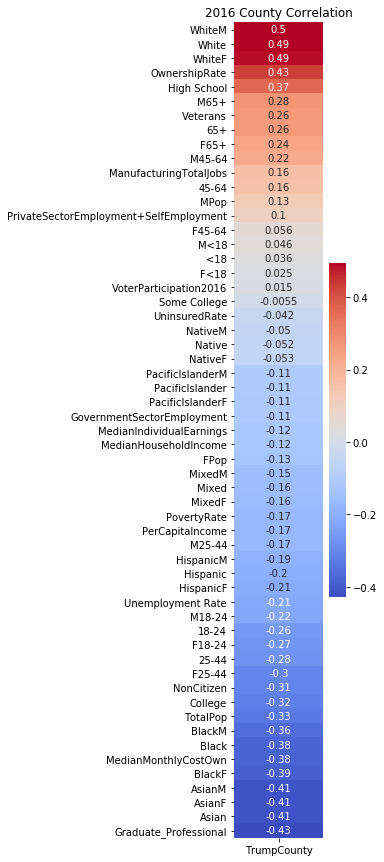

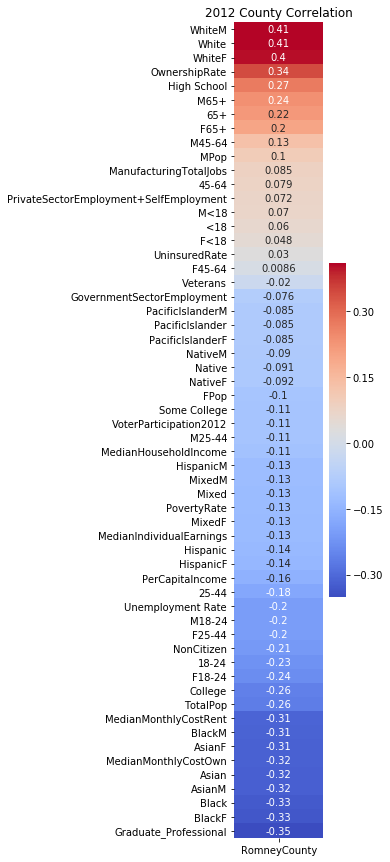

In [68]:
df = pd.DataFrame(county2016DF.corr()['TrumpCounty'])
df = df.drop(['TrumpCounty'])

#df2 = pd.DataFrame(westnorthcentralDF.corr()['TrumpCounty'])
#df2 = df2.drop(['TrumpCounty'])
#plt.figure(figsize=(15,15))
#fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(2,15))
#fig.subplots_adjust(wspace=.5)
#ax.set_title('County Correlation (National)')
#sns.heatmap(df.sort_values(by=['TrumpCounty'], ascending=False), ax = ax, annot=True, cmap="coolwarm", cbar=False)
#sns.heatmap(df2.sort_values(by=['TrumpCounty']), ax = ax2, annot=True, cmap="coolwarm", cbar=False, yticklabels = False)

plt.figure(figsize=(2,15))
sns.heatmap(df.sort_values(by=['TrumpCounty'], ascending=False), annot=True, cmap="coolwarm")
plt.title("2016 County Correlation")
plt.show()

df = pd.DataFrame(county2012DF.corr()['RomneyCounty'])
df = df.drop(['RomneyCounty'])

#df2 = pd.DataFrame(westnorthcentralDF.corr()['TrumpCounty'])
#df2 = df2.drop(['TrumpCounty'])
#plt.figure(figsize=(15,15))
#fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(2,15))
#fig.subplots_adjust(wspace=.5)
#ax.set_title('County Correlation (National)')
#sns.heatmap(df.sort_values(by=['TrumpCounty'], ascending=False), ax = ax, annot=True, cmap="coolwarm", cbar=False)
#sns.heatmap(df2.sort_values(by=['TrumpCounty']), ax = ax2, annot=True, cmap="coolwarm", cbar=False, yticklabels = False)

plt.figure(figsize=(2,15))
sns.heatmap(df.sort_values(by=['RomneyCounty'], ascending=False), annot=True, cmap="coolwarm")
plt.title("2012 County Correlation")
plt.show()

#### County Distribution

In [69]:
print(county2016DF['TrumpCounty'].value_counts())
print(county2012DF['RomneyCounty'].value_counts())
countyDFPlot = county2016DF[(county2016DF.TotalPop > 1000000)]
print(countyDFPlot['TrumpCounty'].value_counts())

1    2623
0     488
Name: TrumpCounty, dtype: int64
1    2418
0     693
Name: RomneyCounty, dtype: int64
0    41
1     3
Name: TrumpCounty, dtype: int64


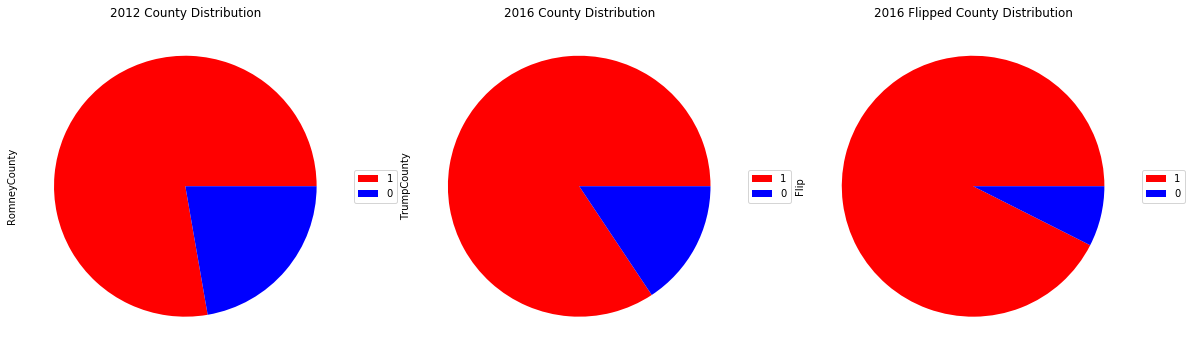

In [70]:
colors = ['red', 'blue']

plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
county2012DF['RomneyCounty'].value_counts().plot.pie(subplots=True, figsize=(5, 5), labels = None, colors = colors)
plt.legend(labels = county2016DF['TrumpCounty'].unique(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("2012 County Distribution")

plt.subplot(1, 3, 2)
county2016DF['TrumpCounty'].value_counts().plot.pie(subplots=True, figsize=(5, 5), labels = None, colors = colors)
plt.legend(labels = county2016DF['TrumpCounty'].unique(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("2016 County Distribution")

plt.subplot(1, 3, 3)
flipDF['Flip'].value_counts().plot.pie(subplots=True, figsize=(5, 5), labels = None, colors = colors)
plt.legend(labels = county2016DF['TrumpCounty'].unique(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("2016 Flipped County Distribution")
plt.show()

#### Large Population County Distribution

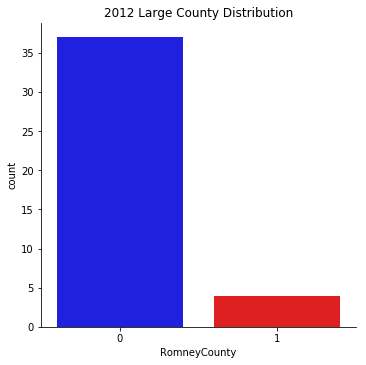

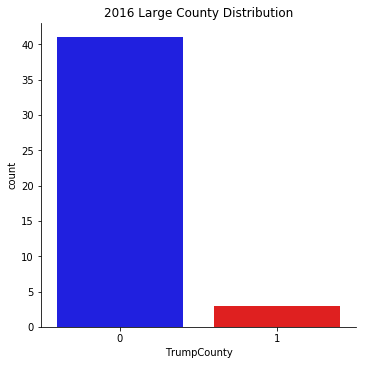

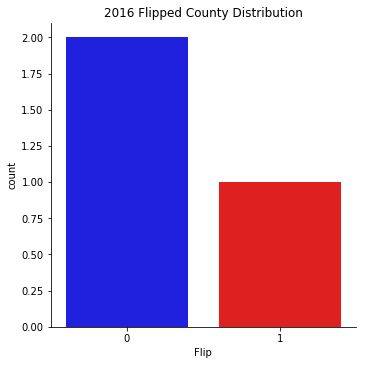

In [71]:
countyDFPlot = county2012DF[(county2012DF.TotalPop > 1000000)]
_ = sns.catplot('RomneyCounty', data=countyDFPlot, kind="count", palette=color_palette)
plt.xticks(rotation=0)
plt.title("2012 Large County Distribution")
plt.show()

countyDFPlot = county2016DF[(county2016DF.TotalPop > 1000000)]
_ = sns.catplot('TrumpCounty', data=countyDFPlot, kind="count", palette=color_palette)
plt.title("2016 Large County Distribution")
plt.xticks(rotation=0)
plt.show()

countyDFPlot = flipDF[(flipDF.TotalPop > 1000000)]
_ = sns.catplot('Flip', data=countyDFPlot, kind="count", palette=color_palette)
plt.title("2016 Flipped County Distribution")
plt.xticks(rotation=0)
plt.show()

#### Race

##### Region

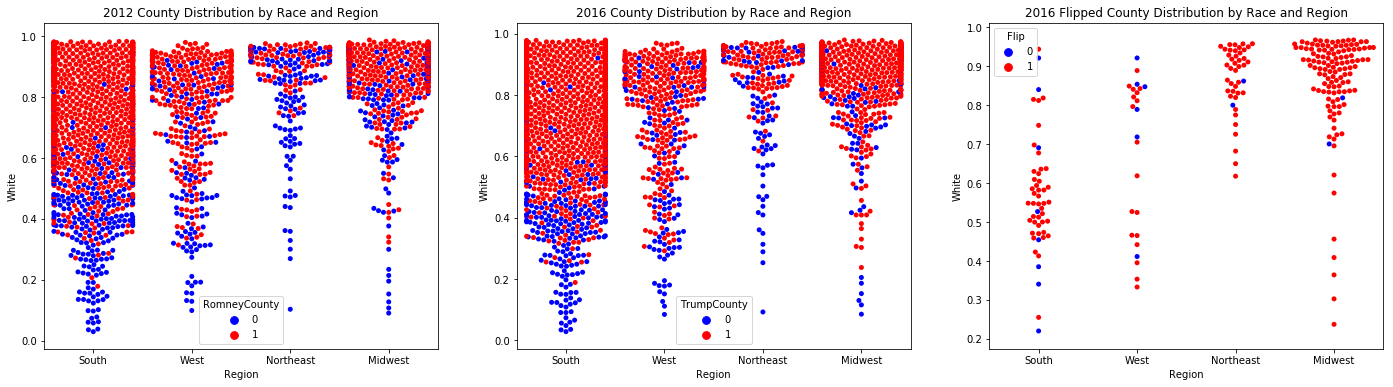

In [72]:
plt.figure(figsize=(24,6))

plt.subplot(1, 3, 1)
sns.swarmplot(x="Region", y="White", hue="RomneyCounty",  palette=color_palette, data=county2012DF)
plt.title('2012 County Distribution by Race and Region')

plt.subplot(1, 3, 2)
sns.swarmplot(x="Region", y="White", hue="TrumpCounty",  palette=color_palette, data=county2016DF)
plt.title('2016 County Distribution by Race and Region')

plt.subplot(1, 3, 3)
sns.swarmplot(x="Region", y="White", hue="Flip",  palette=color_palette, data=flipDF)
plt.title('2016 Flipped County Distribution by Race and Region')

plt.show()

##### Division

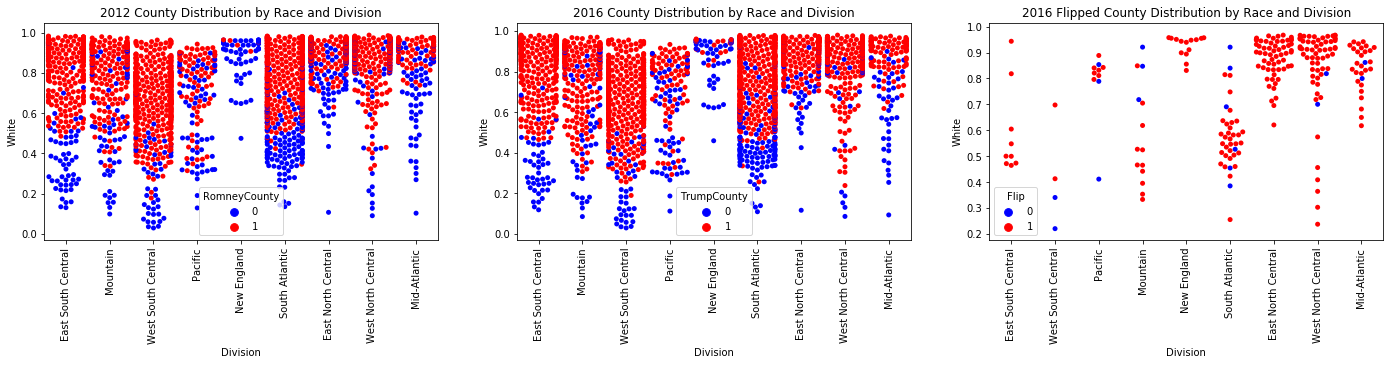

In [73]:
plt.figure(figsize=(24,4))

plt.subplot(1, 3, 1)
sns.swarmplot(x="Division", y="White", hue="RomneyCounty",  palette=color_palette, data=county2012DF)
plt.xticks(rotation='vertical')
plt.title('2012 County Distribution by Race and Division')

plt.subplot(1, 3, 2)
sns.swarmplot(x="Division", y="White", hue="TrumpCounty",  palette=color_palette, data=county2016DF)
plt.xticks(rotation='vertical')
plt.title('2016 County Distribution by Race and Division')

plt.subplot(1, 3, 3)
sns.swarmplot(x="Division", y="White", hue="Flip",  palette=color_palette, data=flipDF)
plt.xticks(rotation='vertical')
plt.title('2016 Flipped County Distribution by Race and Division')

plt.show()

#### Age

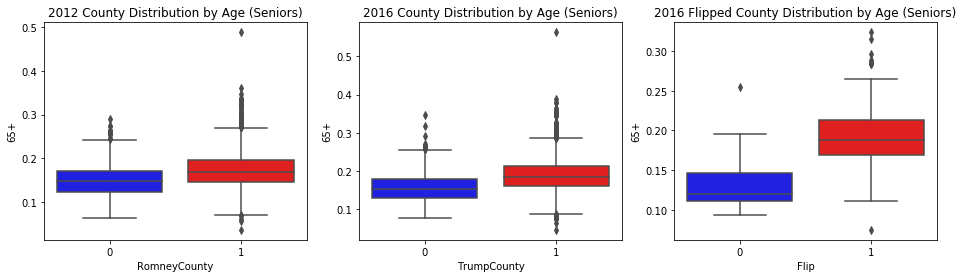

In [74]:
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.boxplot(x="RomneyCounty", y="65+", data=county2012DF, palette=color_palette);
plt.title("2012 County Distribution by Age (Seniors)")

plt.subplot(1, 3, 2)
sns.boxplot(x="TrumpCounty", y="65+", data=county2016DF, palette=color_palette);
plt.title("2016 County Distribution by Age (Seniors)")

plt.subplot(1, 3, 3)
sns.boxplot(x="Flip", y="65+", data=flipDF, palette=color_palette);
plt.title("2016 Flipped County Distribution by Age (Seniors)")
plt.show()

#### Gender

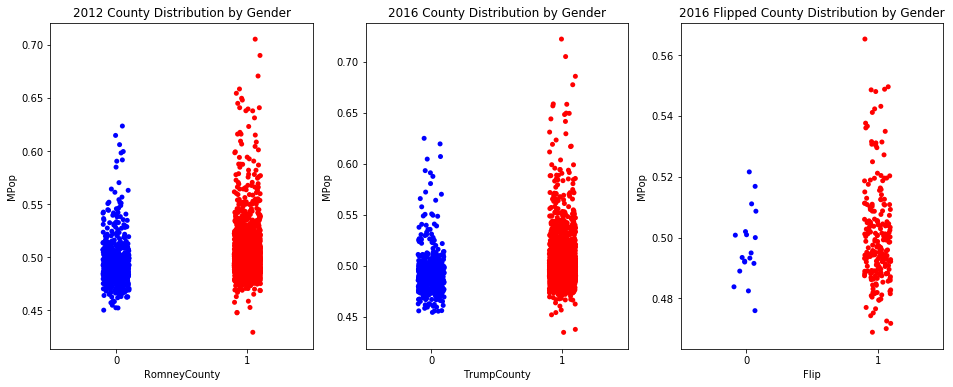

In [75]:
plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
plt.title("County Distribution")
sns.stripplot(x="RomneyCounty", y="MPop", data=county2012DF, jitter=True, palette=color_palette)
plt.title("2012 County Distribution by Gender")

plt.subplot(1, 3, 2)
plt.title("County Distribution")
sns.stripplot(x="TrumpCounty", y="MPop", data=county2016DF, jitter=True, palette=color_palette)
plt.title("2016 County Distribution by Gender")

plt.subplot(1, 3, 3)
plt.title("County Distribution")
sns.stripplot(x="Flip", y="MPop", data=flipDF, jitter=True, palette=color_palette)
plt.title("2016 Flipped County Distribution by Gender")
plt.show()

#### Age + Gender

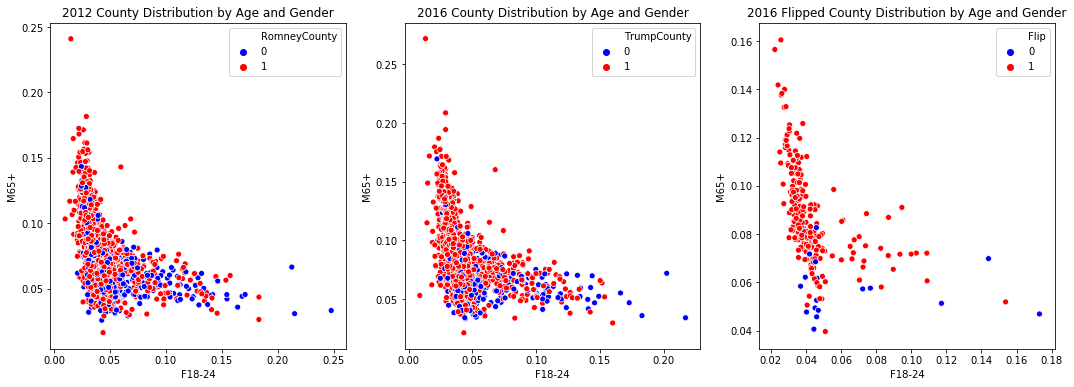

In [76]:
plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
sns.scatterplot(x="F18-24", y="M65+", hue="RomneyCounty", data=county2012DF, palette=color_palette)
plt.title("2012 County Distribution by Age and Gender")

plt.subplot(1, 3, 2)
sns.scatterplot(x="F18-24", y="M65+", hue="TrumpCounty", data=county2016DF, palette=color_palette)
plt.title("2016 County Distribution by Age and Gender")

plt.subplot(1, 3, 3)
sns.scatterplot(x="F18-24", y="M65+", hue="Flip", data=flipDF, palette=color_palette)
plt.title("2016 Flipped County Distribution by Age and Gender")
plt.show()

#### Race + Gender + Age

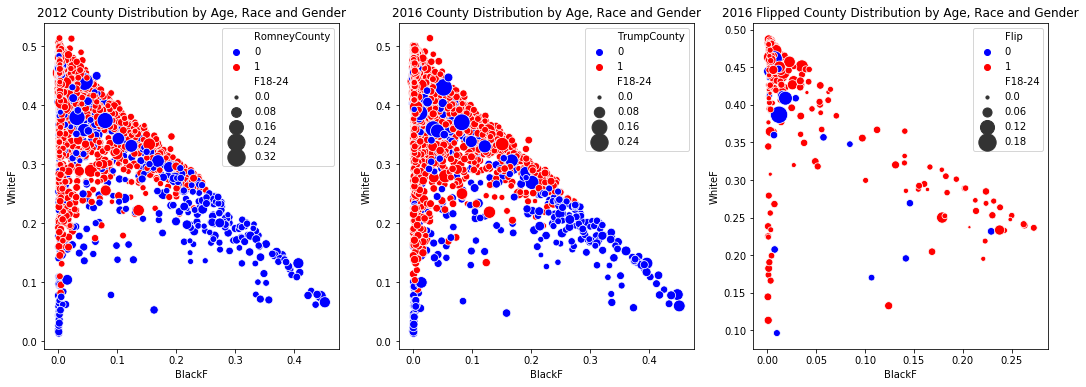

In [77]:
plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
sns.scatterplot(x="BlackF", y="WhiteF", hue="RomneyCounty", size="F18-24", data=county2012DF, sizes=(10, 300), palette=color_palette)
plt.title("2012 County Distribution by Age, Race and Gender")

plt.subplot(1, 3, 2)
sns.scatterplot(x="BlackF", y="WhiteF", hue="TrumpCounty", size="F18-24", data=county2016DF, sizes=(10, 300), palette=color_palette)
plt.title("2016 County Distribution by Age, Race and Gender")

plt.subplot(1, 3, 3)
sns.scatterplot(x="BlackF", y="WhiteF", hue="Flip", size="F18-24", data=flipDF, sizes=(10, 300), palette=color_palette)
plt.title("2016 Flipped County Distribution by Age, Race and Gender")
plt.show()

#### Manufacturing

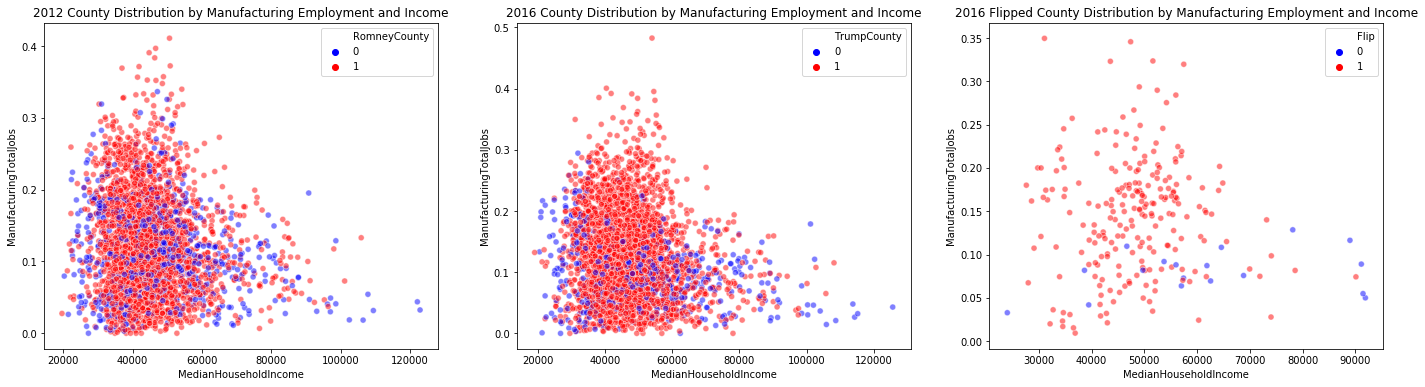

In [78]:
plt.figure(figsize=(24,6))

plt.subplot(1, 3, 1)
sns.scatterplot(x="MedianHouseholdIncome", hue="RomneyCounty", data=county2012DF, y="ManufacturingTotalJobs", palette=color_palette,sizes=(10, 300), alpha=.5)
plt.title("2012 County Distribution by Manufacturing Employment and Income")

plt.subplot(1, 3, 2)
sns.scatterplot(x="MedianHouseholdIncome", hue="TrumpCounty", data=county2016DF, y="ManufacturingTotalJobs", palette=color_palette,sizes=(10, 300), alpha=.5)
plt.title("2016 County Distribution by Manufacturing Employment and Income")

plt.subplot(1, 3, 3)
sns.scatterplot(x="MedianHouseholdIncome", hue="Flip", data=flipDF, y="ManufacturingTotalJobs", palette=color_palette,sizes=(10, 300), alpha=.5)
plt.title("2016 Flipped County Distribution by Manufacturing Employment and Income")
plt.show()

#### Education

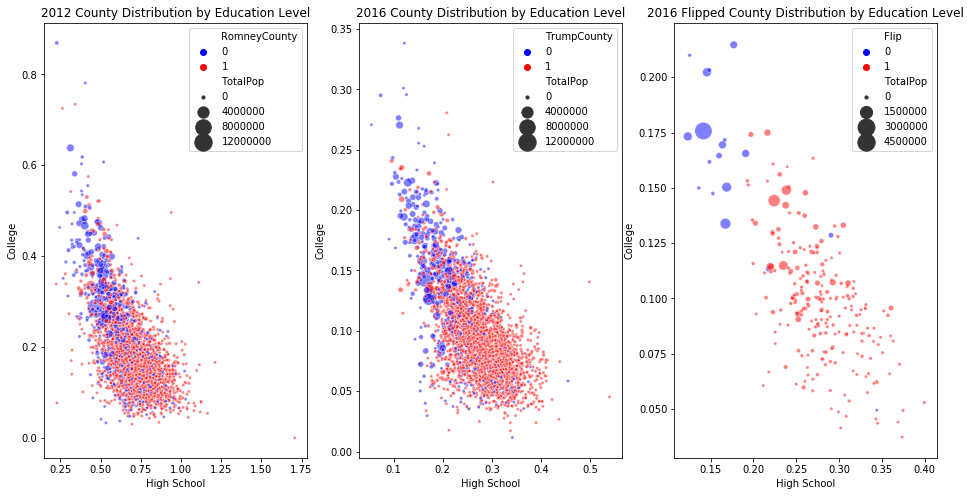

In [79]:
plt.figure(figsize=(16,8))

plt.subplot(1, 3, 1)
sns.scatterplot(x="High School", hue="RomneyCounty", data=county2012DF, y="College", size = "TotalPop", palette=color_palette,sizes=(10, 300), alpha=.5)
plt.title("2012 County Distribution by Education Level")

plt.subplot(1, 3, 2)
sns.scatterplot(x="High School", hue="TrumpCounty", data=county2016DF, y="College", size = "TotalPop", palette=color_palette,sizes=(10, 300), alpha=.5)
plt.title("2016 County Distribution by Education Level")

plt.subplot(1, 3, 3)
sns.scatterplot(x="High School", hue="Flip", data=flipDF, y="College", size = "TotalPop", palette=color_palette,sizes=(10, 300), alpha=.5)
plt.title("2016 Flipped County Distribution by Education Level")
plt.show()

#### Poverty

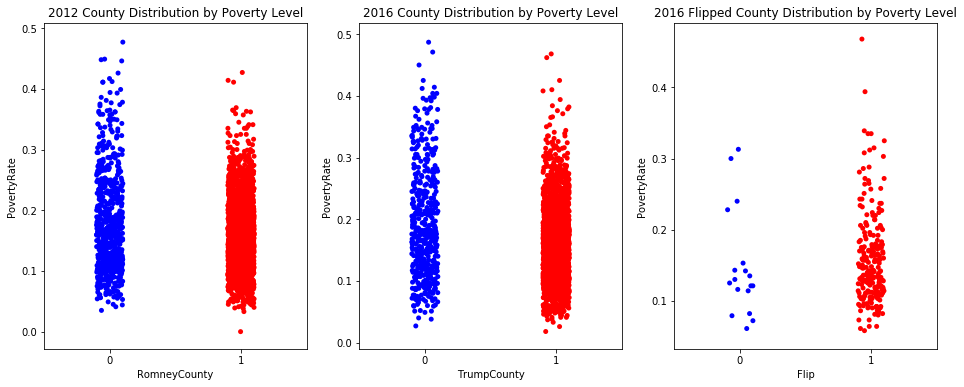

In [80]:
plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)
plt.title("2012 County Distribution by Poverty Level")
sns.stripplot(x="RomneyCounty", y="PovertyRate", data=county2012DF, jitter=True, palette=color_palette)

plt.subplot(1, 3, 2)
plt.title("2016 County Distribution by Poverty Level")
sns.stripplot(x="TrumpCounty", y="PovertyRate", data=county2016DF, jitter=True, palette=color_palette)

plt.subplot(1, 3, 3)
plt.title("2016 Flipped County Distribution by Poverty Level")
sns.stripplot(x="Flip", y="PovertyRate", data=flipDF, jitter=True, palette=color_palette)
plt.show()

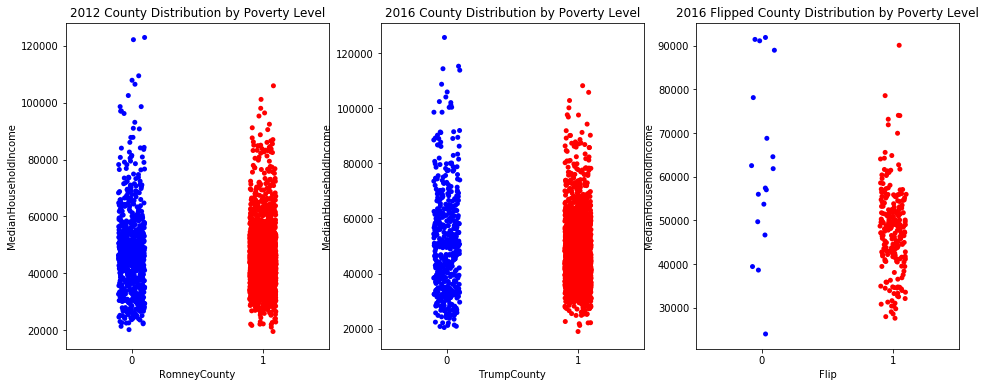

In [81]:
plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)
plt.title("2012 County Distribution by Poverty Level")
sns.stripplot(x="RomneyCounty", y="MedianHouseholdIncome", data=county2012DF, jitter=True, palette=color_palette)

plt.subplot(1, 3, 2)
plt.title("2016 County Distribution by Poverty Level")
sns.stripplot(x="TrumpCounty", y="MedianHouseholdIncome", data=county2016DF, jitter=True, palette=color_palette)

plt.subplot(1, 3, 3)
plt.title("2016 Flipped County Distribution by Poverty Level")
sns.stripplot(x="Flip", y="MedianHouseholdIncome", data=flipDF, jitter=True, palette=color_palette)
plt.show()

### Dropping Columns from Prior to Region and Division Creation

In [0]:
#Dropping Division and Region from Dataframes
county2016DF = county2016DF.drop(['Region', 'Division'],axis = 1)
south2016DF = south2016DF.drop(['Region'],axis = 1)
midwest2016DF = midwest2016DF.drop(['Region'],axis = 1)
northeast2016DF = northeast2016DF.drop(['Region'],axis = 1)
west2016DF = west2016DF.drop(['Region'],axis = 1)
eastnorthcentral2016DF = eastnorthcentral2016DF.drop(['Division', 'Region'],axis = 1)
westnorthcentral2016DF = westnorthcentral2016DF.drop(['Division', 'Region'],axis = 1)
southatlantic2016DF = southatlantic2016DF.drop(['Division', 'Region'],axis = 1)
westsouthcentral2016DF = westsouthcentral2016DF.drop(['Division', 'Region'],axis = 1)
eastsouthcentral2016DF = eastsouthcentral2016DF.drop(['Division', 'Region'],axis = 1)
mountain2016DF = mountain2016DF.drop(['Division', 'Region'],axis = 1)
midatlantic2016DF = midatlantic2016DF.drop(['Division', 'Region'],axis = 1)
pacific2016DF = pacific2016DF.drop(['Division', 'Region'],axis = 1)
newengland2016DF = newengland2016DF.drop(['Division', 'Region'],axis = 1)

county2012DF = county2012DF.drop(['Region', 'Division'],axis = 1)
south2012DF = south2012DF.drop(['Region'],axis = 1)
midwest2012DF = midwest2012DF.drop(['Region'],axis = 1)
northeast2012DF = northeast2012DF.drop(['Region'],axis = 1)
west2012DF = west2012DF.drop(['Region'],axis = 1)
eastnorthcentral2012DF = eastnorthcentral2012DF.drop(['Division', 'Region'],axis = 1)
westnorthcentral2012DF = westnorthcentral2012DF.drop(['Division', 'Region'],axis = 1)
southatlantic2012DF = southatlantic2012DF.drop(['Division', 'Region'],axis = 1)
westsouthcentral2012DF = westsouthcentral2012DF.drop(['Division', 'Region'],axis = 1)
eastsouthcentral2012DF = eastsouthcentral2012DF.drop(['Division', 'Region'],axis = 1)
mountain2012DF = mountain2012DF.drop(['Division', 'Region'],axis = 1)
midatlantic2012DF = midatlantic2012DF.drop(['Division', 'Region'],axis = 1)
pacific2012DF = pacific2012DF.drop(['Division', 'Region'],axis = 1)
newengland2012DF = newengland2012DF.drop(['Division', 'Region'],axis = 1)

flipDF = flipDF.drop(['Region', 'Division'],axis = 1)



In [83]:
south2016DF.head()

,state_po,county,TotalPop,MPop,FPop,65+,M65+,F65+,<18,M<18,F<18,18-24,M18-24,F18-24,25-44,M25-44,F25-44,45-64,M45-64,F45-64,OwnershipRate,PovertyRate,Unemployment Rate,ManufacturingTotalJobs,GovernmentSectorEmployment,MedianIndividualEarnings,PrivateSectorEmployment+SelfEmployment,MedianMonthlyCostRent,MedianHouseholdIncome,MedianMonthlyCostOwn,PerCapitaIncome,UninsuredRate,Graduate_Professional,High School,Some College,College,Veterans,NonCitizen,White,Black,Hispanic,Native,Asian,PacificIslander,Mixed,WhiteM,BlackM,HispanicM,NativeM,AsianM,PacificIslanderM,MixedM,WhiteF,BlackF,HispanicF,NativeF,AsianF,PacificIslanderF,MixedF,TrumpCounty,VoterParticipation2016
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,AL,Autauga,55416,0.487116,0.512884,0.147286,0.063556,0.083730,0.244081,0.124278,0.119803,0.082251,0.042641,0.039609,0.259907,0.126877,0.133030,0.266475,0.129764,0.136711,0.731635,0.123,0.056,0.139972,0.222,33969,0.777,896,53099,885,26168,0.089,0.067923,0.257958,0.172531,0.100260,0.123,0.009690,0.750000,0.190487,0.025263,0.004205,0.011260,0.000650,0.018136,0.367475,0.090515,0.013029,0.001877,0.004620,0.000307,0.009293,0.382525,0.099971,0.012235,0.002328,0.006641,0.000343,0.008842,1,0.596157
1003,AL,Baldwin,208563,0.485422,0.514578,0.197082,0.091761,0.105321,0.217344,0.109214,0.108130,0.074328,0.037773,0.036555,0.234984,0.115088,0.119897,0.276262,0.131586,0.144676,0.717308,0.130,0.063,0.092373,0.127,31625,0.871,889,51365,878,28069,0.118,0.068536,0.215901,0.180243,0.135666,0.125,0.018474,0.832022,0.090428,0.042534,0.006852,0.010615,0.000432,0.017117,0.404161,0.043670,0.021802,0.003428,0.004047,0.000211,0.008103,0.427861,0.046758,0.020732,0.003423,0.006569,0.000221,0.009014,1,0.583307
1005,AL,Barbour,25965,0.530676,0.469324,0.180166,0.078105,0.102060,0.211361,0.105142,0.106220,0.082842,0.048026,0.034816,0.266282,0.163489,0.102792,0.259349,0.135914,0.123435,0.639005,0.264,0.128,0.224063,0.191,26979,0.809,588,33956,551,17249,0.130,0.036010,0.289775,0.155209,0.058425,0.084,0.020335,0.464510,0.475140,0.041556,0.002889,0.004506,0.000809,0.010591,0.245638,0.252378,0.022453,0.001541,0.002157,0.000501,0.006008,0.218872,0.222761,0.019103,0.001348,0.002349,0.000308,0.004583,1,0.511257
1007,AL,Bibb,22643,0.536369,0.463631,0.154308,0.069160,0.085148,0.207526,0.109173,0.098353,0.080511,0.046681,0.033829,0.284812,0.168176,0.116636,0.272844,0.143179,0.129665,0.726305,0.165,0.071,0.211396,0.171,30119,0.826,654,39776,595,18988,0.090,0.040586,0.319216,0.185046,0.044208,0.072,0.010025,0.744159,0.216182,0.024334,0.003356,0.001987,0.000309,0.009672,0.380117,0.134832,0.013691,0.001811,0.000795,0.000265,0.004858,0.364042,0.081350,0.010643,0.001546,0.001192,0.000044,0.004814,1,0.491473
1009,AL,Blount,57704,0.493865,0.506135,0.179866,0.081346,0.098520,0.231908,0.116924,0.114983,0.077204,0.040604,0.036601,0.241335,0.120217,0.121118,0.269687,0.134774,0.134913,0.788302,0.165,0.060,0.155699,0.125,35223,0.871,631,46212,638,21033,0.112,0.028230,0.251646,0.190697,0.063358,0.101,0.030812,0.874671,0.014349,0.089197,0.004714,0.002357,0.000347,0.014366,0.428653,0.007556,0.047796,0.002357,0.000988,0.000243,0.006273,0.446018,0.006793,0.041401,0.002357,0.001369,0.000104,0.008093,1,0.577321


## Modeling

In [0]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB

def createModel(dataFrame,model,response):
    X_train, X_test, Y_train, Y_test = train_test_split(dataFrame,response,test_size=0.25, random_state=0)
    #scaler=preprocessing.MinMaxScaler().fit(X_train)
    #X_train=scaler.transform(X_train)
    #X_test=scaler.transform(X_test)

    cross_DF=cross_val_predict(model,dataFrame,response,cv=5);
    model.fit(X_train, Y_train)
    #y_pred = model.predict(X_test)
    confusion=confusion_matrix(list(response),cross_DF)
    precision=precision_score(list(response),cross_DF)
    recall=recall_score(list(response),cross_DF)
    accuracy=accuracy_score(list(response),cross_DF)
    auc=roc_auc_score(list(response),cross_DF)
    TN=confusion[0,0]
    FP=confusion[0,1]
    FN=confusion[1,0]
    TP=confusion[1,1]
    fpr, tpr, _ = metrics.roc_curve(list(response),cross_DF)
    auc = metrics.roc_auc_score(list(response),cross_DF)
    plt.plot(fpr,tpr,label=name(model)+", auc="+str(auc))
    plt.legend(loc=4)
    return [[precision,recall,accuracy,auc,TN,FP,FN,TP],model]

# We will take in the dataframe, model and output it

def name(model):
    return model.__class__.__name__

def models():
    return [ LogisticRegression(),
            KNeighborsClassifier(n_neighbors=9),
            DecisionTreeClassifier(max_depth=1),
            GaussianNB(priors=None),
            SVC(C=100),
            LinearSVC(C=100),
            AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
            GradientBoostingClassifier(n_estimators=600)
            ]
  
def featureImportance(dataFrame,model,response):
    X_train, X_test, Y_train, Y_test = train_test_split(dataFrame,response,test_size=0.25, random_state=0)
    #scaler=preprocessing.MinMaxScaler().fit(X_train)
    #X_train=scaler.transform(X_train)
    #X_test=scaler.transform(X_test)
    model.fit(X_train, Y_train)
    try:
          temp = model.fit(X_train, Y_train)
          importances = list(zip(model.feature_importances_, X_train.columns))
          importances.sort(reverse = True)
          pd.DataFrame(importances, index=[x for(_,x) in importances]).plot(kind='bar',figsize=(15,5), legend = False, title = "Feature Importance - "+name(model))
    except:
          print("");
    return;

# We will take in the 2012 or 2016 dataframe, classification model
def runModel(dataFrame,model,response):
    y_pred = model.predict(dataFrame)
    confusion=confusion_matrix(list(response),y_pred)
    precision=precision_score(list(response),y_pred)
    recall=recall_score(list(response),y_pred)
    accuracy=accuracy_score(list(response),y_pred)
    auc=roc_auc_score(list(response),y_pred)
    TN=confusion[0,0]
    FP=confusion[0,1]
    FN=confusion[1,0]
    TP=confusion[1,1]
    fpr, tpr, _ = metrics.roc_curve(list(response),y_pred)
    auc = metrics.roc_auc_score(list(response),y_pred)
    plt.plot(fpr,tpr,label=name(model)+", auc="+str(auc))
    plt.legend(loc=4)
    return [precision,recall,accuracy,auc,TN,FP,FN,TP]

#### Classifying 2016 Election with 2016 Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

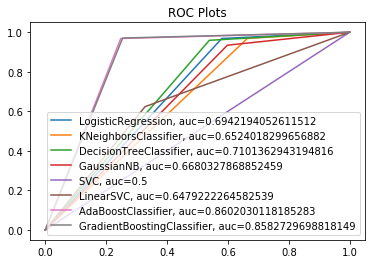

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.954528,0.968357,0.934426,0.860203,367.0,121.0,83.0,2540.0
DecisionTreeClassifier,0.905362,0.959207,0.881067,0.710136,225.0,263.0,107.0,2516.0
GaussianNB,0.893547,0.934426,0.850852,0.668033,196.0,292.0,172.0,2451.0
GradientBoostingClassifier,0.953558,0.970644,0.935391,0.858273,364.0,124.0,77.0,2546.0
KNeighborsClassifier,0.886911,0.968738,0.869495,0.652402,164.0,324.0,82.0,2541.0
LinearSVC,0.910913,0.623713,0.631308,0.647922,328.0,160.0,987.0,1636.0
LogisticRegression,0.899752,0.968357,0.882353,0.694219,205.0,283.0,83.0,2540.0
SVC,0.843137,1.000000,0.843137,0.500000,0.0,488.0,0.0,2623.0


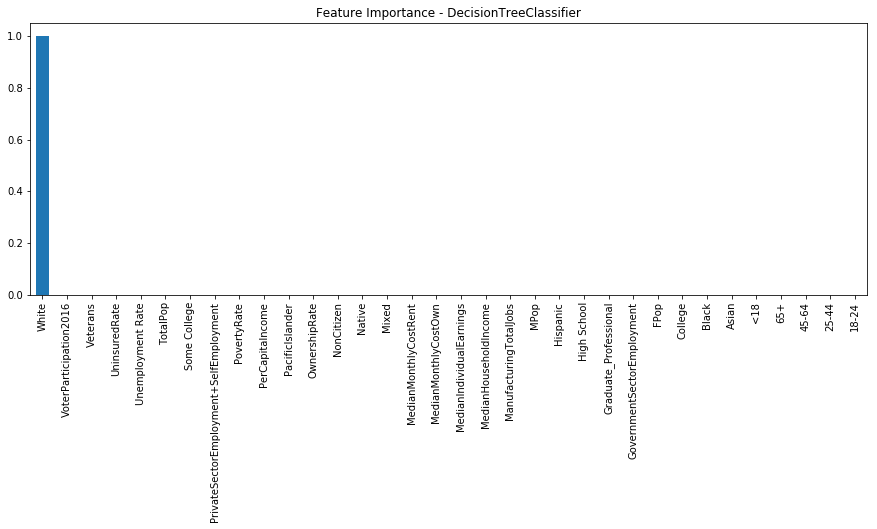

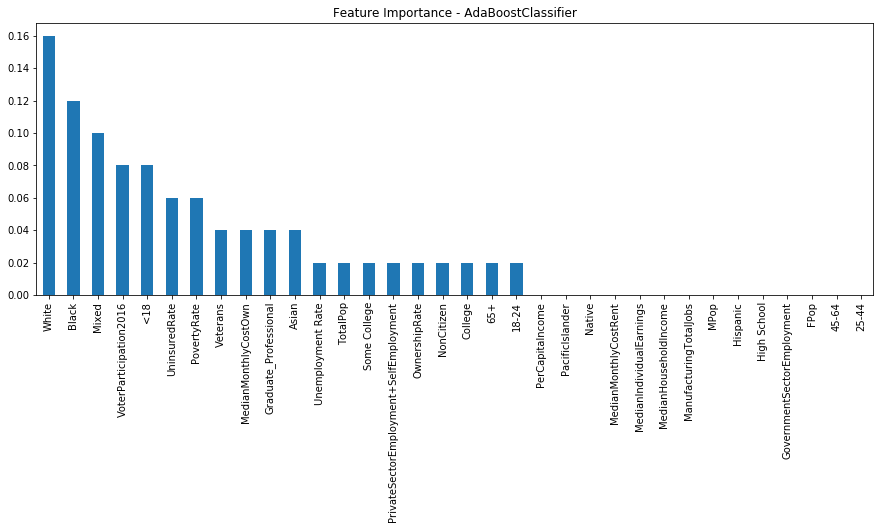

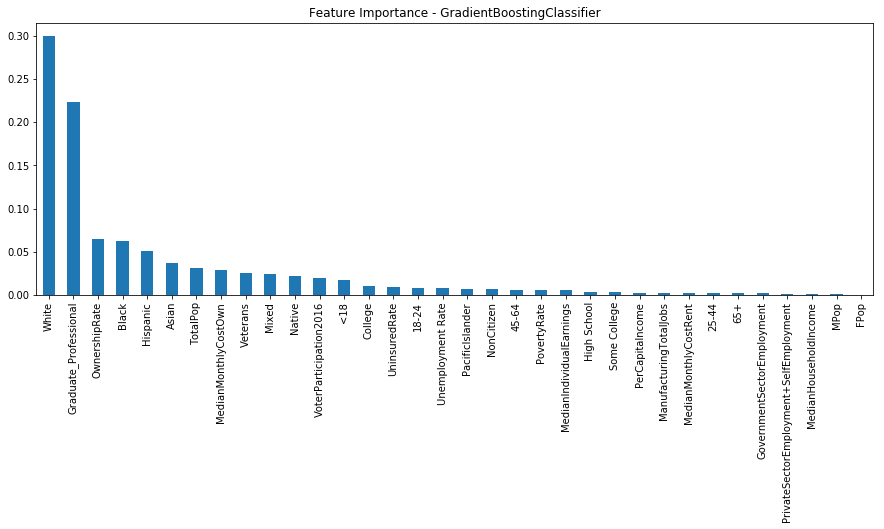

In [85]:
dataFrame=county2016DF[county2016DF.columns[~county2016DF.columns.isin(['TrumpCounty','state_po', 'county', 'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
       'F25-44','M45-64', 'F45-64'])]]
response=county2016DF['TrumpCounty']

table = {name(m): createModel(dataFrame,m,response) for m in models()}

plt.title("ROC Plots")
plt.show()

featureImportances={name(m): featureImportance(dataFrame,m,response) for m in models()}

tableParams={}
tableModels={}
for model in models():
    tableParams[name(model)]=table[name(model)][0]
    tableModels[name(model)]=table[name(model)][1]

dataFrameTable=pd.DataFrame(tableParams).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

### Classifying 2016 Election with 2012 Classifier (Race)

#### Building 2012 Classifier

In [86]:
county2012DF.columns

Index(['state_po', 'county', 'TotalPop', 'MPop', 'FPop', '65+', 'M65+', 'F65+',
       '<18', 'M<18', 'F<18', '18-24', 'M18-24', 'F18-24', '25-44', 'M25-44',
       'F25-44', '45-64', 'M45-64', 'F45-64', 'OwnershipRate', 'PovertyRate',
       'Unemployment Rate', 'ManufacturingTotalJobs',
       'GovernmentSectorEmployment', 'MedianIndividualEarnings',
       'PrivateSectorEmployment+SelfEmployment', 'MedianMonthlyCostRent',
       'MedianHouseholdIncome', 'MedianMonthlyCostOwn', 'PerCapitaIncome',
       'UninsuredRate', 'Graduate_Professional', 'High School', 'Some College',
       'College', 'Veterans', 'NonCitizen', 'White', 'Black', 'Hispanic',
       'Native', 'Asian', 'PacificIslander', 'Mixed', 'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'RomneyCounty', 'VoterParticipation2012'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

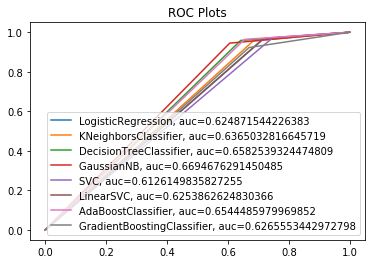

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.836984,0.964020,0.826101,0.654449,239.0,454.0,87.0,2331.0
DecisionTreeClassifier,0.838943,0.958644,0.824815,0.658254,248.0,445.0,100.0,2318.0
GaussianNB,0.844732,0.944996,0.822244,0.669468,273.0,420.0,133.0,2285.0
GradientBoostingClassifier,0.827829,0.922663,0.790743,0.626555,229.0,464.0,187.0,2231.0
KNeighborsClassifier,0.829986,0.956989,0.814208,0.636503,219.0,474.0,104.0,2314.0
LinearSVC,0.824921,0.966501,0.814529,0.625386,197.0,496.0,81.0,2337.0
LogisticRegression,0.824691,0.966915,0.814529,0.624872,196.0,497.0,80.0,2338.0
SVC,0.819512,0.972705,0.812279,0.612615,175.0,518.0,66.0,2352.0


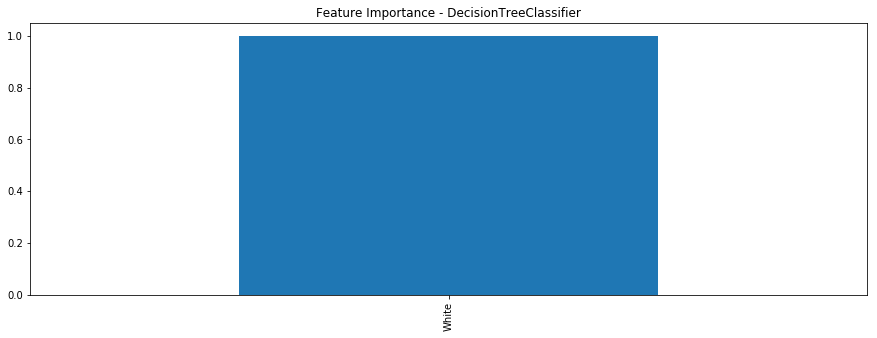

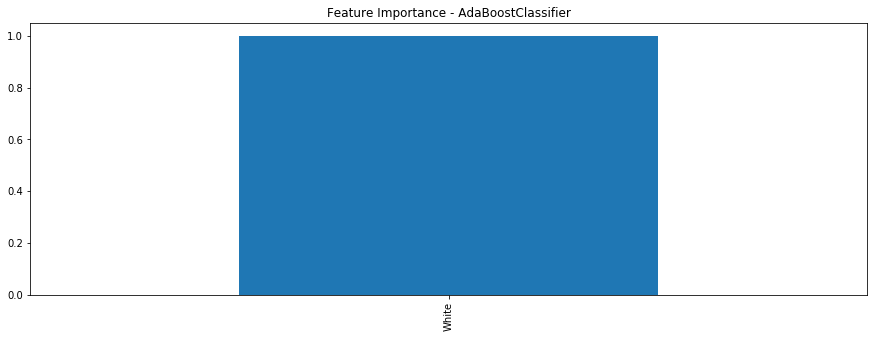

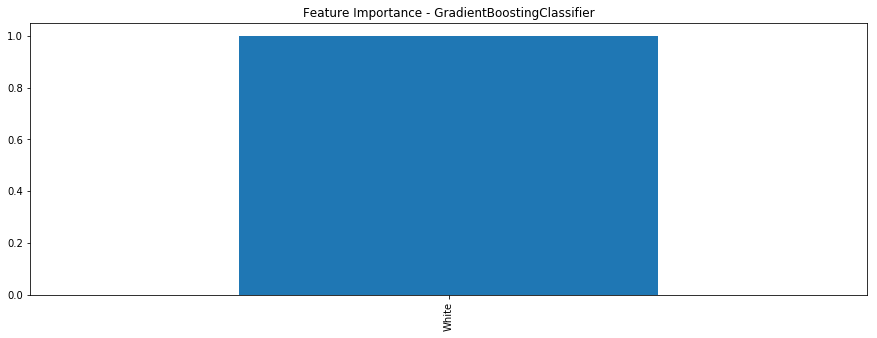

In [87]:
#dataFrame=county2012DF[county2012DF.columns[~county2012DF.columns.isin(['RomneyCounty','state_po', 'county', 'WhiteM', 'BlackM',
#       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
#       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
#       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
#       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
#       'F25-44','M45-64', 'F45-64'])]]
dataFrame=county2012DF[['White']]
response=county2012DF['RomneyCounty']

table = {name(m): createModel(dataFrame,m,response) for m in models()}

plt.title("ROC Plots")
plt.show()

featureImportances={name(m): featureImportance(dataFrame,m,response) for m in models()}

tableParams={}
tableModels={}
for model in models():
    tableParams[name(model)]=table[name(model)][0]
    tableModels[name(model)]=table[name(model)][1]

dataFrameTable=pd.DataFrame(tableParams).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

#### Apply 2012 Classifier to 2016 Data

,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.907636,0.951582,0.877531,0.715545,234.0,254.0,127.0,2496.0
DecisionTreeClassifier,0.909953,0.951582,0.879781,0.722717,241.0,247.0,127.0,2496.0
GaussianNB,0.912190,0.938620,0.872067,0.726482,251.0,237.0,161.0,2462.0
GradientBoostingClassifier,0.892331,0.900496,0.824494,0.658240,203.0,285.0,261.0,2362.0
KNeighborsClassifier,0.901989,0.950820,0.871424,0.697746,217.0,271.0,129.0,2494.0
LinearSVC,0.898413,0.971026,0.882996,0.690431,200.0,288.0,76.0,2547.0
LogisticRegression,0.898694,0.970644,0.882996,0.691265,201.0,287.0,77.0,2546.0
SVC,0.893706,0.974457,0.880746,0.675753,184.0,304.0,67.0,2556.0


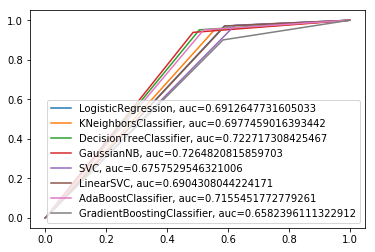

In [88]:
#dataFrame=county2016DF[county2016DF.columns[~county2016DF.columns.isin(['TrumpCounty','state_po', 'county',  'WhiteM', 'BlackM',
#       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
#       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
#       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
#       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
#       'F25-44','M45-64', 'F45-64'])]]
dataFrame=county2016DF[['White']]
response=county2016DF['TrumpCounty']

table = {m: runModel(dataFrame,tableModels[m],response) for m in tableModels}

dataFrameTable=pd.DataFrame(table).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

#### Classifing 2016 Flipped Counties with 2012 Classifier

,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.938389,0.887892,0.842324,0.582835,5.0,13.0,25.0,198.0
DecisionTreeClassifier,0.938389,0.887892,0.842324,0.582835,5.0,13.0,25.0,198.0
GaussianNB,0.941463,0.865471,0.825726,0.599402,6.0,12.0,30.0,193.0
GradientBoostingClassifier,0.929648,0.829596,0.784232,0.525909,4.0,14.0,38.0,185.0
KNeighborsClassifier,0.934884,0.901345,0.850622,0.561784,4.0,14.0,22.0,201.0
LinearSVC,0.938053,0.950673,0.896266,0.586447,4.0,14.0,11.0,212.0
LogisticRegression,0.938053,0.950673,0.896266,0.586447,4.0,14.0,11.0,212.0
SVC,0.938326,0.955157,0.900415,0.588690,4.0,14.0,10.0,213.0


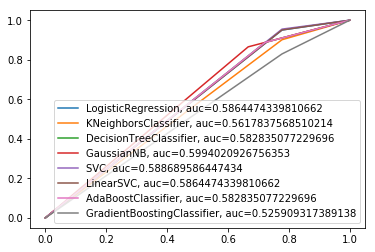

In [89]:
#dataFrame=flipDF[flipDF.columns[~flipDF.columns.isin(['Flip','state_po', 'county',  'WhiteM', 'BlackM',
#       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
#       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
#       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
#       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
#       'F25-44','M45-64', 'F45-64'])]]
dataFrame=flipDF[['White']]
response=flipDF['Flip']

table = {m: runModel(dataFrame,tableModels[m],response) for m in tableModels}

dataFrameTable=pd.DataFrame(table).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

### Classifying 2016 Election with 2012 Classifier (General Demographics)

#### Building 2012 Classifier

In [90]:
county2012DF.columns

Index(['state_po', 'county', 'TotalPop', 'MPop', 'FPop', '65+', 'M65+', 'F65+',
       '<18', 'M<18', 'F<18', '18-24', 'M18-24', 'F18-24', '25-44', 'M25-44',
       'F25-44', '45-64', 'M45-64', 'F45-64', 'OwnershipRate', 'PovertyRate',
       'Unemployment Rate', 'ManufacturingTotalJobs',
       'GovernmentSectorEmployment', 'MedianIndividualEarnings',
       'PrivateSectorEmployment+SelfEmployment', 'MedianMonthlyCostRent',
       'MedianHouseholdIncome', 'MedianMonthlyCostOwn', 'PerCapitaIncome',
       'UninsuredRate', 'Graduate_Professional', 'High School', 'Some College',
       'College', 'Veterans', 'NonCitizen', 'White', 'Black', 'Hispanic',
       'Native', 'Asian', 'PacificIslander', 'Mixed', 'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'RomneyCounty', 'VoterParticipation2012'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

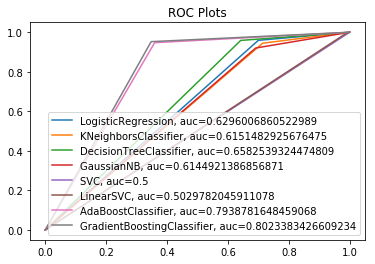

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.901930,0.947064,0.878817,0.793878,444.0,249.0,128.0,2290.0
DecisionTreeClassifier,0.838943,0.958644,0.824815,0.658254,248.0,445.0,100.0,2318.0
GaussianNB,0.822855,0.920182,0.783992,0.614492,214.0,479.0,193.0,2225.0
GradientBoostingClassifier,0.905267,0.952440,0.885567,0.802338,452.0,241.0,115.0,2303.0
KNeighborsClassifier,0.821878,0.944582,0.797814,0.615148,198.0,495.0,134.0,2284.0
LinearSVC,0.778282,0.992969,0.774671,0.502978,9.0,684.0,17.0,2401.0
LogisticRegression,0.827033,0.959057,0.812279,0.629601,208.0,485.0,99.0,2319.0
SVC,0.777242,1.000000,0.777242,0.500000,0.0,693.0,0.0,2418.0


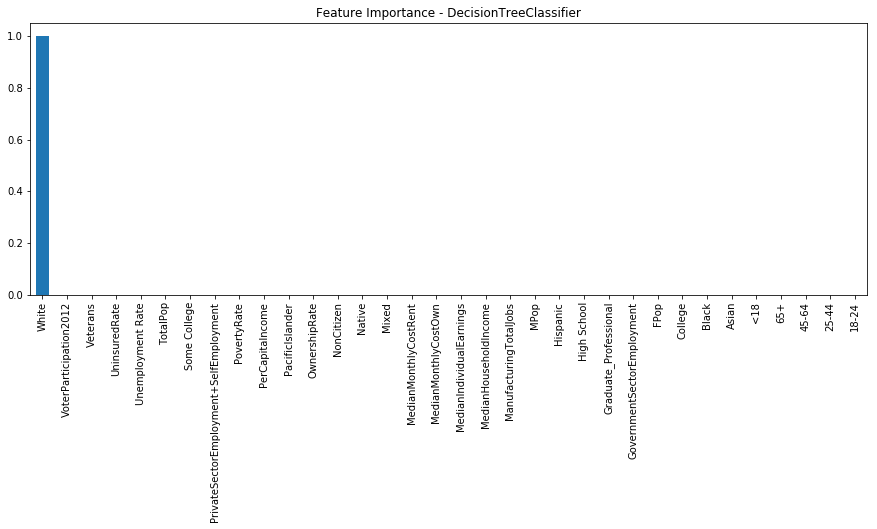

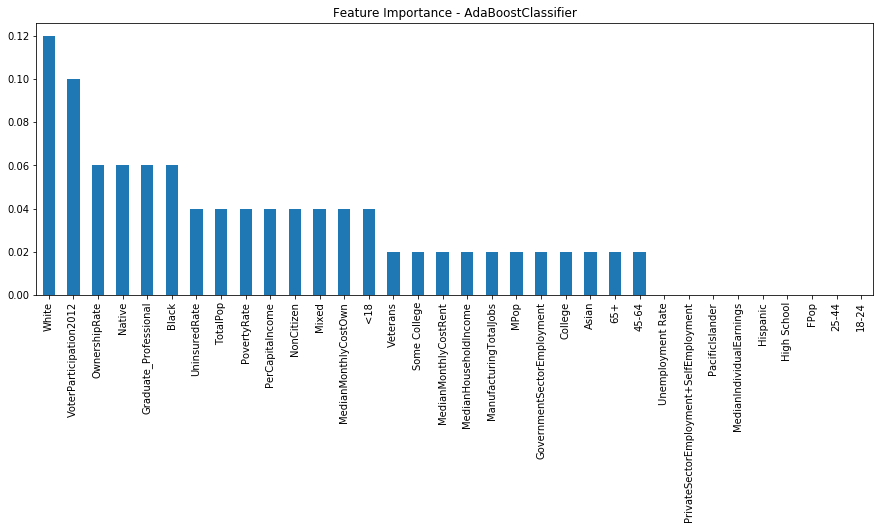

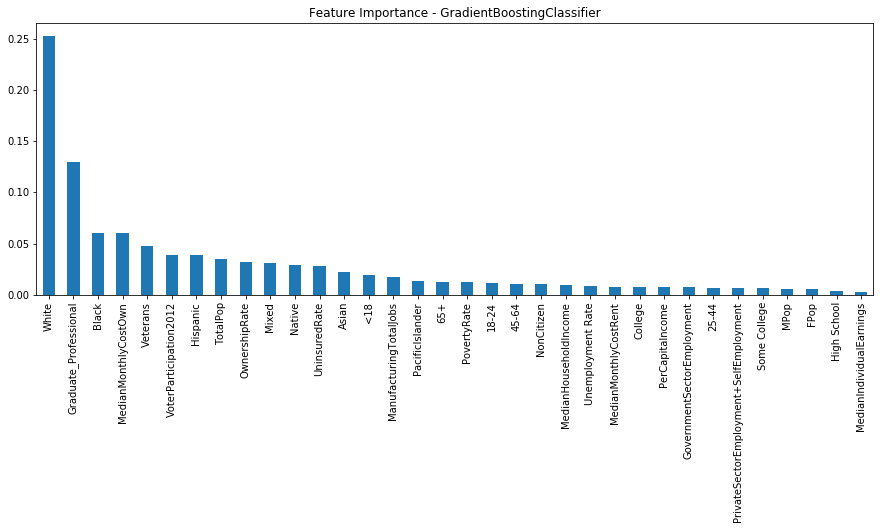

In [91]:
dataFrame=county2012DF[county2012DF.columns[~county2012DF.columns.isin(['RomneyCounty','state_po', 'county', 'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
       'F25-44','M45-64', 'F45-64'])]]
#scaler=preprocessing.MinMaxScaler().fit(dataFrame[['TotalPop', 'PerCapitaIncome', 'MedianMonthlyCostOwn', 'MedianMonthlyCostRent', 'MedianIndividualEarnings', 'MedianHouseholdIncome']])
#dataFrame=scaler.transform(dataFrame[['TotalPop', 'PerCapitaIncome', 'MedianMonthlyCostOwn', 'MedianMonthlyCostRent', 'MedianIndividualEarnings', 'MedianHouseholdIncome']])

response=county2012DF['RomneyCounty']

table = {name(m): createModel(dataFrame,m,response) for m in models()}

plt.title("ROC Plots")
plt.show()

featureImportances={name(m): featureImportance(dataFrame,m,response) for m in models()}

tableParams={}
tableModels={}
for model in models():
    tableParams[name(model)]=table[name(model)][0]
    tableModels[name(model)]=table[name(model)][1]

dataFrameTable=pd.DataFrame(tableParams).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

#### Apply 2012 Classifier to 2016 Data

,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.957154,0.953870,0.925104,0.862181,376.0,112.0,121.0,2502.0
DecisionTreeClassifier,0.909953,0.951582,0.879781,0.722717,241.0,247.0,127.0,2496.0
GaussianNB,0.900191,0.897446,0.829637,0.681305,227.0,261.0,269.0,2354.0
GradientBoostingClassifier,0.956718,0.969119,0.936998,0.866732,373.0,115.0,81.0,2542.0
KNeighborsClassifier,0.898098,0.954251,0.870138,0.686142,204.0,284.0,120.0,2503.0
LinearSVC,0.938830,0.672894,0.687239,0.718619,373.0,115.0,858.0,1765.0
LogisticRegression,0.881772,0.986657,0.877210,0.637795,141.0,347.0,35.0,2588.0
SVC,0.843137,1.000000,0.843137,0.500000,0.0,488.0,0.0,2623.0


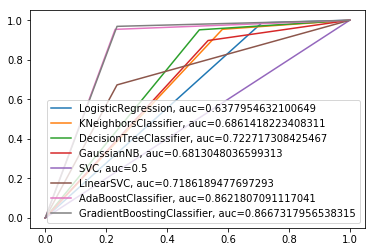

In [92]:
dataFrame=county2016DF[county2016DF.columns[~county2016DF.columns.isin(['TrumpCounty','state_po', 'county',  'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
       'F25-44','M45-64', 'F45-64'])]]
#scaler=preprocessing.MinMaxScaler().fit(dataFrame[['TotalPop', 'PerCapitaIncome', 'MedianMonthlyCostOwn', 'MedianMonthlyCostRent', 'MedianIndividualEarnings', 'MedianHouseholdIncome']])
#dataFrame=scaler.transform(dataFrame[['TotalPop', 'PerCapitaIncome', 'MedianMonthlyCostOwn', 'MedianMonthlyCostRent', 'MedianIndividualEarnings', 'MedianHouseholdIncome']])
response=county2016DF['TrumpCounty']

table = {m: runModel(dataFrame,tableModels[m],response) for m in tableModels}

dataFrameTable=pd.DataFrame(table).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

#### Classifing 2016 Flipped Counties with 2012 Classifier

,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.973118,0.811659,0.804979,0.766941,13.0,5.0,42.0,181.0
DecisionTreeClassifier,0.938389,0.887892,0.842324,0.582835,5.0,13.0,25.0,198.0
GaussianNB,0.966507,0.905830,0.883817,0.758470,11.0,7.0,21.0,202.0
GradientBoostingClassifier,0.932961,0.748879,0.717842,0.541106,6.0,12.0,56.0,167.0
KNeighborsClassifier,0.961905,0.905830,0.879668,0.730693,10.0,8.0,21.0,202.0
LinearSVC,0.984127,0.556054,0.580913,0.722471,16.0,2.0,99.0,124.0
LogisticRegression,0.935345,0.973094,0.912863,0.569880,3.0,15.0,6.0,217.0
SVC,0.925311,1.000000,0.925311,0.500000,0.0,18.0,0.0,223.0


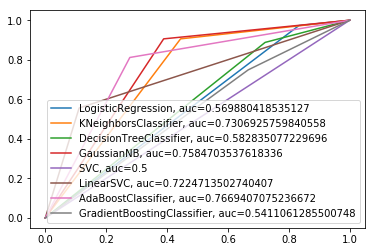

In [93]:
dataFrame=flipDF[flipDF.columns[~flipDF.columns.isin(['Flip','state_po', 'county',  'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
       'F25-44','M45-64', 'F45-64'])]]
response=flipDF['Flip']

table = {m: runModel(dataFrame,tableModels[m],response) for m in tableModels}

dataFrameTable=pd.DataFrame(table).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

### Classifying 2016 Election with 2012 Classifier (Specific Demographics)

#### Building 2012 Classifier

In [94]:
county2012DF.columns

Index(['state_po', 'county', 'TotalPop', 'MPop', 'FPop', '65+', 'M65+', 'F65+',
       '<18', 'M<18', 'F<18', '18-24', 'M18-24', 'F18-24', '25-44', 'M25-44',
       'F25-44', '45-64', 'M45-64', 'F45-64', 'OwnershipRate', 'PovertyRate',
       'Unemployment Rate', 'ManufacturingTotalJobs',
       'GovernmentSectorEmployment', 'MedianIndividualEarnings',
       'PrivateSectorEmployment+SelfEmployment', 'MedianMonthlyCostRent',
       'MedianHouseholdIncome', 'MedianMonthlyCostOwn', 'PerCapitaIncome',
       'UninsuredRate', 'Graduate_Professional', 'High School', 'Some College',
       'College', 'Veterans', 'NonCitizen', 'White', 'Black', 'Hispanic',
       'Native', 'Asian', 'PacificIslander', 'Mixed', 'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'RomneyCounty', 'VoterParticipation2012'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

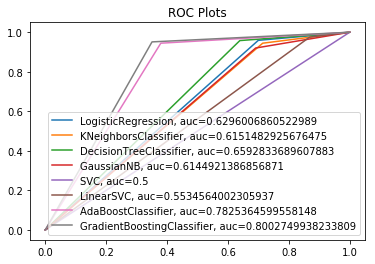

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.896741,0.944582,0.872388,0.782536,430.0,263.0,134.0,2284.0
DecisionTreeClassifier,0.839435,0.957816,0.824815,0.659283,250.0,443.0,102.0,2316.0
GaussianNB,0.822855,0.920182,0.783992,0.614492,214.0,479.0,193.0,2225.0
GradientBoostingClassifier,0.904444,0.951199,0.883960,0.800275,450.0,243.0,118.0,2300.0
KNeighborsClassifier,0.821878,0.944582,0.797814,0.615148,198.0,495.0,134.0,2284.0
LinearSVC,0.796690,0.975600,0.787528,0.553456,91.0,602.0,59.0,2359.0
LogisticRegression,0.827033,0.959057,0.812279,0.629601,208.0,485.0,99.0,2319.0
SVC,0.777242,1.000000,0.777242,0.500000,0.0,693.0,0.0,2418.0


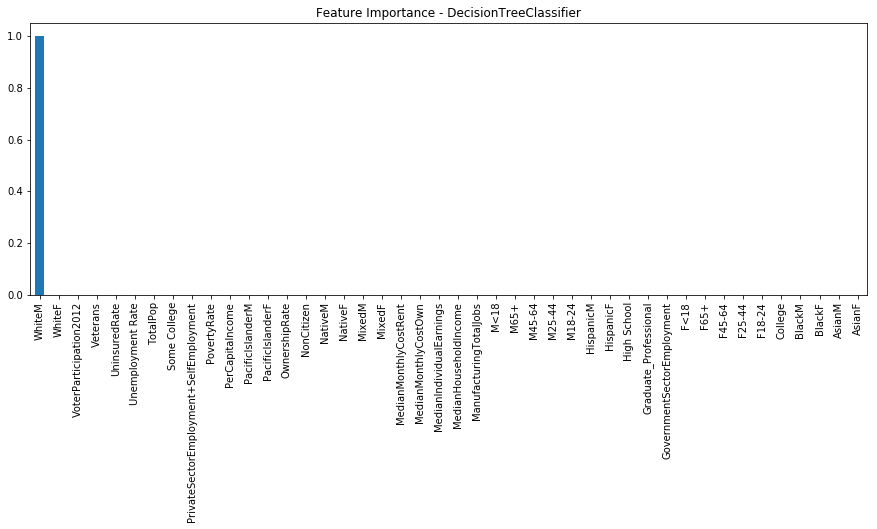

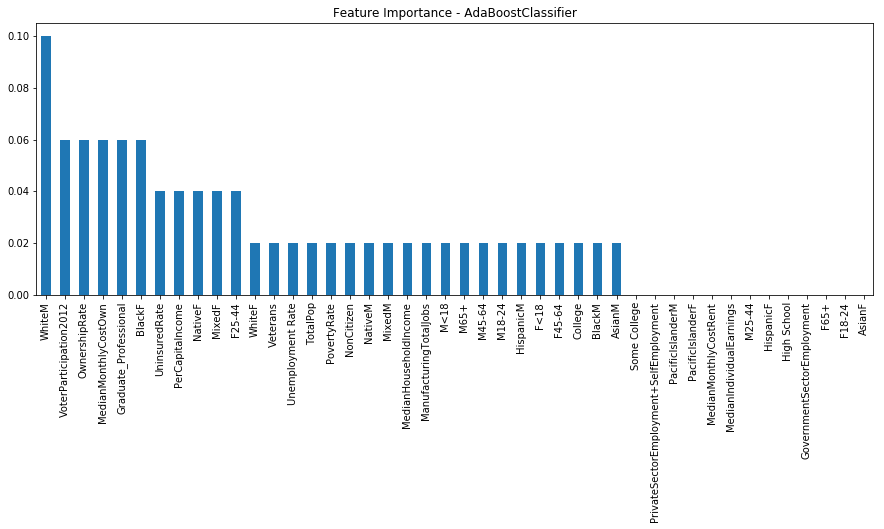

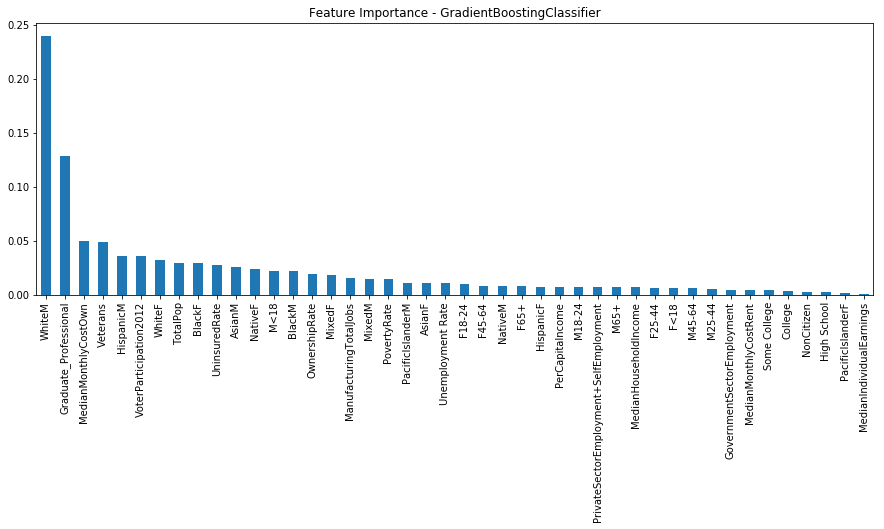

In [95]:
dataFrame=county2012DF[county2012DF.columns[~county2012DF.columns.isin(['RomneyCounty','state_po', 'county', 'White', 'Black',
       'Hispanic', 'Native', 'Asian', 'PacificIslander', 'Mixed', '65+',
       '<18','18-24','25-44','45-64', 'MPop', 'FPop'])]]
response=county2012DF['RomneyCounty']

table = {name(m): createModel(dataFrame,m,response) for m in models()}

plt.title("ROC Plots")
plt.show()

featureImportances={name(m): featureImportance(dataFrame,m,response) for m in models()}

tableParams={}
tableModels={}
for model in models():
    tableParams[name(model)]=table[name(model)][0]
    tableModels[name(model)]=table[name(model)][1]

dataFrameTable=pd.DataFrame(tableParams).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

#### Apply 2012 Classifier to 2016 Data

,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.950506,0.966451,0.929283,0.847979,356.0,132.0,88.0,2535.0
DecisionTreeClassifier,0.910695,0.944720,0.875281,0.723384,245.0,243.0,145.0,2478.0
GaussianNB,0.900191,0.897446,0.829637,0.681305,227.0,261.0,269.0,2354.0
GradientBoostingClassifier,0.955229,0.967976,0.934748,0.862062,369.0,119.0,84.0,2539.0
KNeighborsClassifier,0.898098,0.954251,0.870138,0.686142,204.0,284.0,120.0,2503.0
LinearSVC,0.904851,0.917270,0.848923,0.699414,235.0,253.0,217.0,2406.0
LogisticRegression,0.881772,0.986657,0.877210,0.637795,141.0,347.0,35.0,2588.0
SVC,0.843137,1.000000,0.843137,0.500000,0.0,488.0,0.0,2623.0


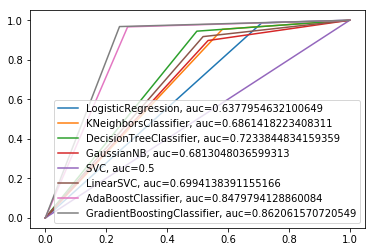

In [96]:
dataFrame=county2016DF[county2016DF.columns[~county2016DF.columns.isin(['TrumpCounty','state_po', 'county', 'White', 'Black',
       'Hispanic', 'Native', 'Asian', 'PacificIslander', 'Mixed', '65+',
       '<18','18-24','25-44','45-64', 'MPop', 'FPop'])]]
response=county2016DF['TrumpCounty']

table = {m: runModel(dataFrame,tableModels[m],response) for m in tableModels}

dataFrameTable=pd.DataFrame(table).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

#### Classifing 2016 Flipped Counties with 2012 Classifier

,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.969231,0.847534,0.834025,0.757100,12.0,6.0,34.0,189.0
DecisionTreeClassifier,0.938095,0.883408,0.838174,0.580593,5.0,13.0,26.0,197.0
GaussianNB,0.966507,0.905830,0.883817,0.758470,11.0,7.0,21.0,202.0
GradientBoostingClassifier,0.937853,0.744395,0.717842,0.566642,7.0,11.0,57.0,166.0
KNeighborsClassifier,0.961905,0.905830,0.879668,0.730693,10.0,8.0,21.0,202.0
LinearSVC,0.969849,0.865471,0.850622,0.766069,12.0,6.0,30.0,193.0
LogisticRegression,0.935345,0.973094,0.912863,0.569880,3.0,15.0,6.0,217.0
SVC,0.925311,1.000000,0.925311,0.500000,0.0,18.0,0.0,223.0


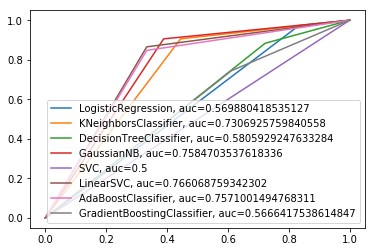

In [97]:
dataFrame=flipDF[flipDF.columns[~flipDF.columns.isin(['Flip','state_po', 'county', 'White', 'Black',
       'Hispanic', 'Native', 'Asian', 'PacificIslander', 'Mixed', '65+',
       '<18','18-24','25-44','45-64', 'MPop', 'FPop'])]]
response=flipDF['Flip']

table = {m: runModel(dataFrame,tableModels[m],response) for m in tableModels}

dataFrameTable=pd.DataFrame(table).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

### Classifing 2016 Election with 2012 Classifier (Balanced Data)

#### Building 2012 Classifier

In [98]:
county2012DF.columns

Index(['state_po', 'county', 'TotalPop', 'MPop', 'FPop', '65+', 'M65+', 'F65+',
       '<18', 'M<18', 'F<18', '18-24', 'M18-24', 'F18-24', '25-44', 'M25-44',
       'F25-44', '45-64', 'M45-64', 'F45-64', 'OwnershipRate', 'PovertyRate',
       'Unemployment Rate', 'ManufacturingTotalJobs',
       'GovernmentSectorEmployment', 'MedianIndividualEarnings',
       'PrivateSectorEmployment+SelfEmployment', 'MedianMonthlyCostRent',
       'MedianHouseholdIncome', 'MedianMonthlyCostOwn', 'PerCapitaIncome',
       'UninsuredRate', 'Graduate_Professional', 'High School', 'Some College',
       'College', 'Veterans', 'NonCitizen', 'White', 'Black', 'Hispanic',
       'Native', 'Asian', 'PacificIslander', 'Mixed', 'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'RomneyCounty', 'VoterParticipation2012'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

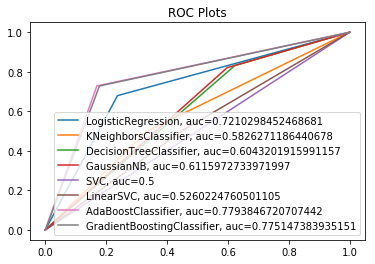

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWar

,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.770115,0.728261,0.785714,0.779385,196.0,40.0,50.0,134.0
DecisionTreeClassifier,0.510000,0.831522,0.576190,0.604320,89.0,147.0,31.0,153.0
GaussianNB,0.517123,0.820652,0.585714,0.611597,95.0,141.0,33.0,151.0
GradientBoostingClassifier,0.761364,0.728261,0.780952,0.775147,194.0,42.0,50.0,134.0
KNeighborsClassifier,0.538012,0.500000,0.592857,0.582627,157.0,79.0,92.0,92.0
LinearSVC,0.465000,0.505435,0.528571,0.526022,129.0,107.0,91.0,93.0
LogisticRegression,0.690608,0.679348,0.726190,0.721030,180.0,56.0,59.0,125.0
SVC,0.000000,0.000000,0.561905,0.500000,236.0,0.0,184.0,0.0


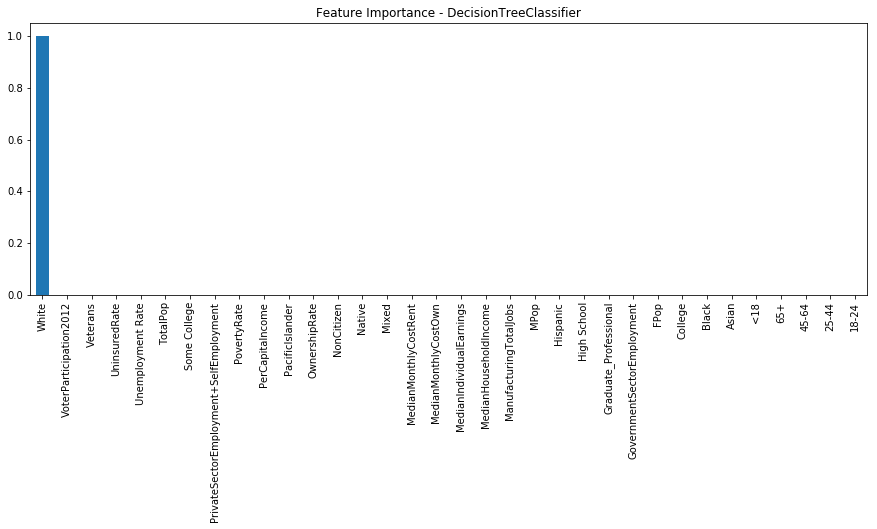

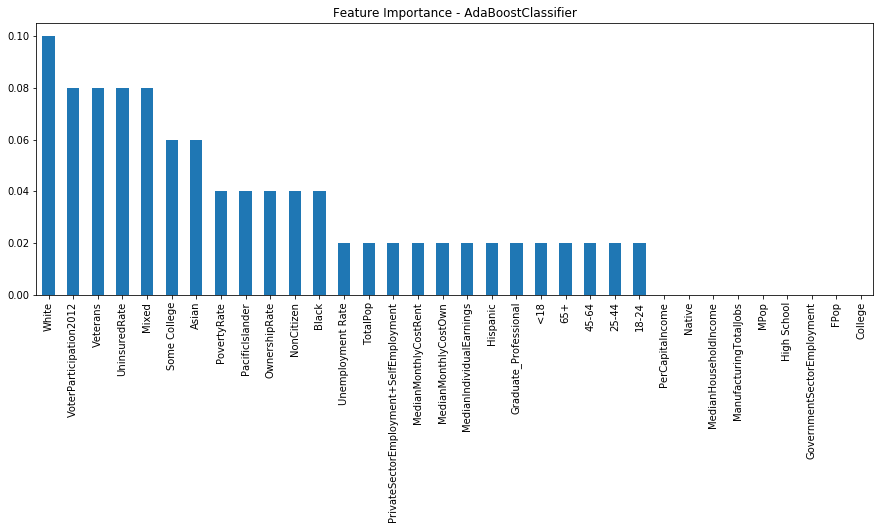

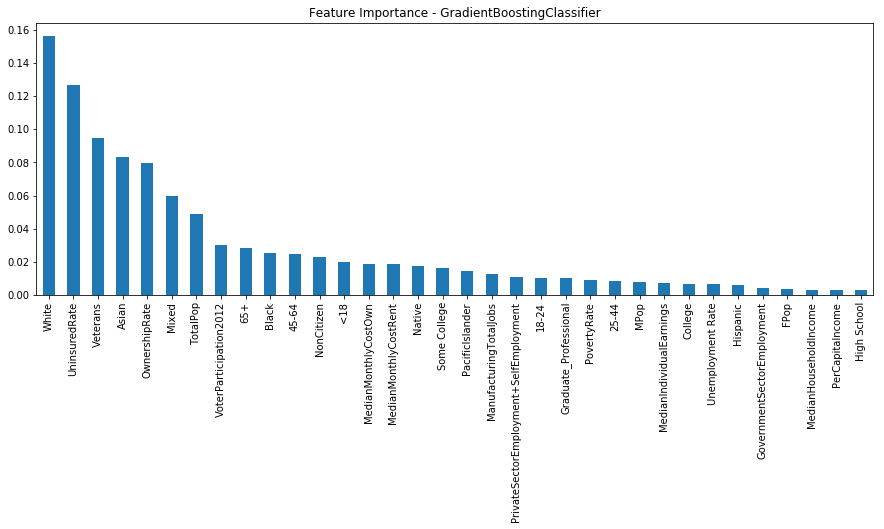

In [99]:
county2012DFB = county2012DF[(county2012DF.TotalPop > 150000)]
dataFrame=county2012DFB[county2012DFB.columns[~county2012DFB.columns.isin(['RomneyCounty','state_po', 'county', 'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
       'F25-44','M45-64', 'F45-64'])]]
response=county2012DFB['RomneyCounty']

table = {name(m): createModel(dataFrame,m,response) for m in models()}

plt.title("ROC Plots")
plt.show()

featureImportances={name(m): featureImportance(dataFrame,m,response) for m in models()}

tableParams={}
tableModels={}
for model in models():
    tableParams[name(model)]=table[name(model)][0]
    tableModels[name(model)]=table[name(model)][1]

dataFrameTable=pd.DataFrame(tableParams).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

#### Apply 2012 Classifier to 2016 Data

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.811321,0.788991,0.802752,0.802752,178.0,40.0,46.0,172.0
DecisionTreeClassifier,0.656604,0.798165,0.690367,0.690367,127.0,91.0,44.0,174.0
GaussianNB,0.625874,0.821101,0.665138,0.665138,111.0,107.0,39.0,179.0
GradientBoostingClassifier,0.895833,0.788991,0.848624,0.848624,198.0,20.0,46.0,172.0
KNeighborsClassifier,0.678756,0.600917,0.658257,0.658257,156.0,62.0,87.0,131.0
LinearSVC,0.500000,1.000000,0.500000,0.500000,0.0,218.0,0.0,218.0
LogisticRegression,0.680000,0.857798,0.727064,0.727064,130.0,88.0,31.0,187.0
SVC,0.000000,0.000000,0.500000,0.500000,218.0,0.0,218.0,0.0


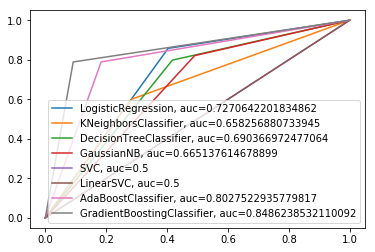

In [100]:
county2016DFB = county2016DF[(county2016DF.TotalPop > 150000)]

dataFrame=county2016DFB[county2016DFB.columns[~county2016DFB.columns.isin(['TrumpCounty','state_po', 'county',  'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
       'F25-44','M45-64', 'F45-64'])]]
response=county2016DFB['TrumpCounty']

table = {m: runModel(dataFrame,tableModels[m],response) for m in tableModels}

dataFrameTable=pd.DataFrame(table).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

#### Classifing 2016 Flipped Counties with 2012 Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.800000,0.666667,0.634146,0.606061,6.0,5.0,10.0,20.0
DecisionTreeClassifier,0.800000,0.800000,0.707317,0.627273,5.0,6.0,6.0,24.0
GaussianNB,0.846154,0.733333,0.707317,0.684848,7.0,4.0,8.0,22.0
GradientBoostingClassifier,0.722222,0.433333,0.463415,0.489394,6.0,5.0,17.0,13.0
KNeighborsClassifier,0.857143,0.400000,0.512195,0.609091,9.0,2.0,18.0,12.0
LinearSVC,0.731707,1.000000,0.731707,0.500000,0.0,11.0,0.0,30.0
LogisticRegression,0.718750,0.766667,0.609756,0.474242,2.0,9.0,7.0,23.0
SVC,0.000000,0.000000,0.268293,0.500000,11.0,0.0,30.0,0.0


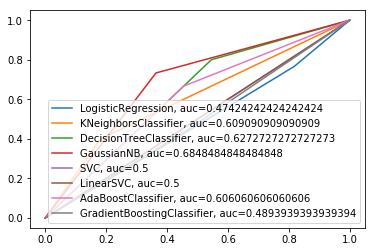

In [101]:
flipDFB = flipDF[(flipDF.TotalPop > 150000)]

dataFrame=flipDFB[flipDFB.columns[~flipDFB.columns.isin(['Flip','state_po', 'county',  'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
       'F25-44','M45-64', 'F45-64'])]]
response=flipDFB['Flip']

table = {m: runModel(dataFrame,tableModels[m],response) for m in tableModels}

dataFrameTable=pd.DataFrame(table).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

### Classifing 2016 Election with 2012 Classifier (Midwest)

#### Building 2012 Classifier

In [102]:
county2012DF.columns

Index(['state_po', 'county', 'TotalPop', 'MPop', 'FPop', '65+', 'M65+', 'F65+',
       '<18', 'M<18', 'F<18', '18-24', 'M18-24', 'F18-24', '25-44', 'M25-44',
       'F25-44', '45-64', 'M45-64', 'F45-64', 'OwnershipRate', 'PovertyRate',
       'Unemployment Rate', 'ManufacturingTotalJobs',
       'GovernmentSectorEmployment', 'MedianIndividualEarnings',
       'PrivateSectorEmployment+SelfEmployment', 'MedianMonthlyCostRent',
       'MedianHouseholdIncome', 'MedianMonthlyCostOwn', 'PerCapitaIncome',
       'UninsuredRate', 'Graduate_Professional', 'High School', 'Some College',
       'College', 'Veterans', 'NonCitizen', 'White', 'Black', 'Hispanic',
       'Native', 'Asian', 'PacificIslander', 'Mixed', 'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'RomneyCounty', 'VoterParticipation2012'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

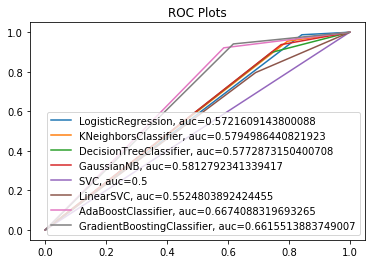

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Futur

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.876516,0.921205,0.829222,0.667409,79.0,112.0,68.0,795.0
DecisionTreeClassifier,0.845147,0.898030,0.781784,0.577287,49.0,142.0,88.0,775.0
GaussianNB,0.845350,0.937428,0.808349,0.581279,43.0,148.0,54.0,809.0
GradientBoostingClassifier,0.873118,0.940904,0.839658,0.661551,73.0,118.0,51.0,812.0
KNeighborsClassifier,0.844262,0.954809,0.818786,0.579499,39.0,152.0,39.0,824.0
LinearSVC,0.838828,0.796060,0.707780,0.552480,59.0,132.0,176.0,687.0
LogisticRegression,0.841066,0.987254,0.836812,0.572161,30.0,161.0,11.0,852.0
SVC,0.818786,1.000000,0.818786,0.500000,0.0,191.0,0.0,863.0


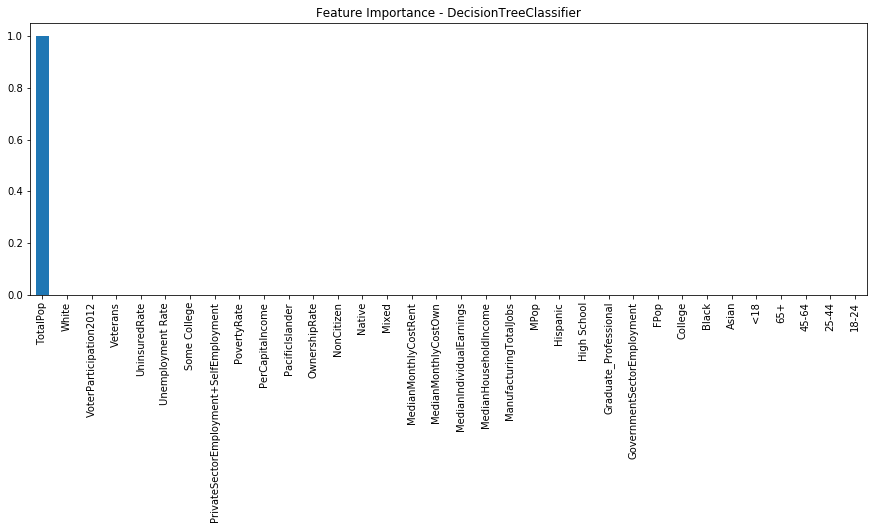

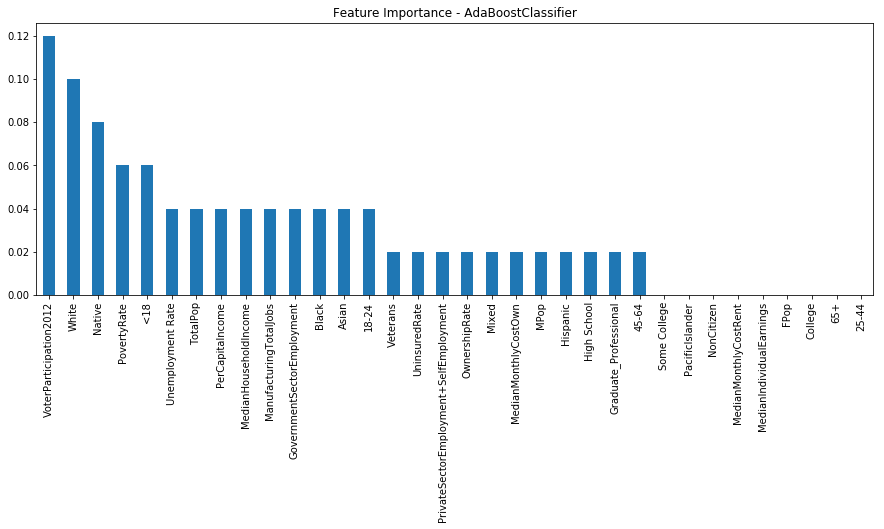

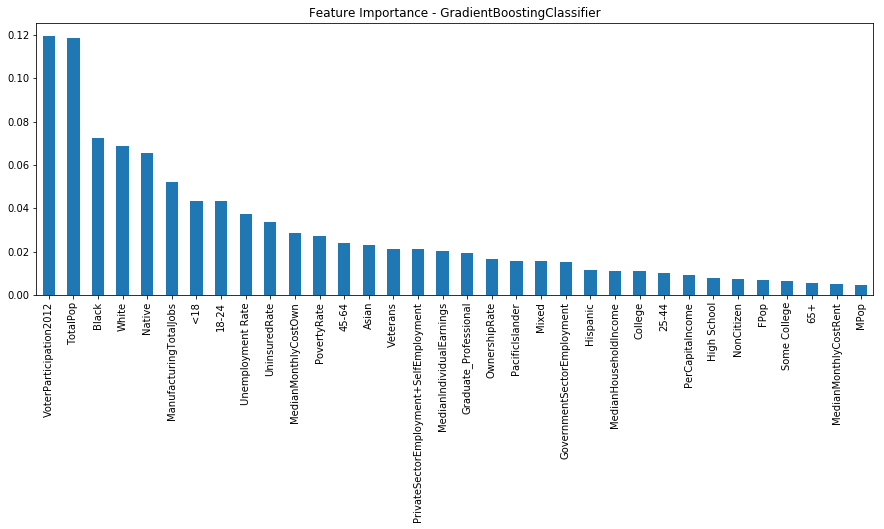

In [103]:
dataFrame=midwest2012DF[midwest2012DF.columns[~midwest2012DF.columns.isin(['RomneyCounty','state_po', 'county', 'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
       'F25-44','M45-64', 'F45-64'])]]
response=midwest2012DF['RomneyCounty']

table = {name(m): createModel(dataFrame,m,response) for m in models()}

plt.title("ROC Plots")
plt.show()

featureImportances={name(m): featureImportance(dataFrame,m,response) for m in models()}

tableParams={}
tableModels={}
for model in models():
    tableParams[name(model)]=table[name(model)][0]
    tableModels[name(model)]=table[name(model)][1]

dataFrameTable=pd.DataFrame(tableParams).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

#### Apply 2012 Classifier to 2016 Data

,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.972832,0.948065,0.926945,0.793477,46.0,26.0,51.0,931.0
DecisionTreeClassifier,0.973767,0.945010,0.925047,0.798894,47.0,25.0,54.0,928.0
GaussianNB,0.969163,0.896130,0.876660,0.753621,44.0,28.0,102.0,880.0
GradientBoostingClassifier,0.983991,0.938900,0.928843,0.865283,57.0,15.0,60.0,922.0
KNeighborsClassifier,0.966976,0.954175,0.926945,0.754865,40.0,32.0,45.0,937.0
LinearSVC,0.931689,1.000000,0.931689,0.500000,0.0,72.0,0.0,982.0
LogisticRegression,0.954057,0.993890,0.949715,0.670556,25.0,47.0,6.0,976.0
SVC,0.931689,1.000000,0.931689,0.500000,0.0,72.0,0.0,982.0


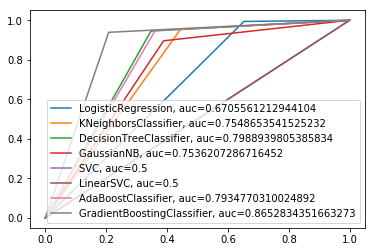

In [104]:
dataFrame=midwest2016DF[midwest2016DF.columns[~midwest2016DF.columns.isin(['TrumpCounty','state_po', 'county',  'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
       'F25-44','M45-64', 'F45-64'])]]
response=midwest2016DF['TrumpCounty']

table = {m: runModel(dataFrame,tableModels[m],response) for m in tableModels}

dataFrameTable=pd.DataFrame(table).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable

#### Classifing 2016 Flipped Counties with 2012 Classifier

,precision,recall,accuracy,auc,TN,FP,FN,TP
AdaBoostClassifier,0.979798,0.801653,0.788618,0.400826,0.0,2.0,24.0,97.0
DecisionTreeClassifier,1.000000,0.909091,0.910569,0.954545,2.0,0.0,11.0,110.0
GaussianNB,1.000000,0.933884,0.934959,0.966942,2.0,0.0,8.0,113.0
GradientBoostingClassifier,0.974026,0.619835,0.609756,0.309917,0.0,2.0,46.0,75.0
KNeighborsClassifier,1.000000,0.892562,0.894309,0.946281,2.0,0.0,13.0,108.0
LinearSVC,0.983740,1.000000,0.983740,0.500000,0.0,2.0,0.0,121.0
LogisticRegression,0.991667,0.983471,0.975610,0.741736,1.0,1.0,2.0,119.0
SVC,0.983740,1.000000,0.983740,0.500000,0.0,2.0,0.0,121.0


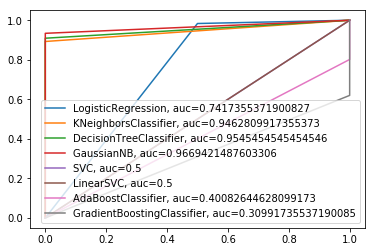

In [105]:
dataFrame=midwestflipDF[midwestflipDF.columns[~midwestflipDF.columns.isin(['Flip','Region','Division','state_po', 'county',  'WhiteM', 'BlackM',
       'HispanicM', 'NativeM', 'AsianM', 'PacificIslanderM', 'MixedM',
       'WhiteF', 'BlackF', 'HispanicF', 'NativeF', 'AsianF',
       'PacificIslanderF', 'MixedF', 'M65+', 'F65+',
       'M<18', 'F<18','M18-24', 'F18-24','M25-44',
       'F25-44','M45-64', 'F45-64'])]]
response=midwestflipDF['Flip']

table = {m: runModel(dataFrame,tableModels[m],response) for m in tableModels}

dataFrameTable=pd.DataFrame(table).T
dataFrameTable.columns=["precision","recall","accuracy","auc","TN","FP","FN","TP"]

dataFrameTable